# Taller 3
#### Integrantes
    * Danelys Brito
    * Félix Vargas
    * Nandy Troncoso
    * Aníbal Plaza

El objetivo de este notebook es que se ejerciten con la aplicación de SVMs y árboles de decisión a problemas de clasificación.


<table align='left'>
<tr>
<td><img src='https://blog.schoolforai.com/content/images/size/w1000/2021/12/Salary-pred.png' width='750'/> </td>
</tr>
</table>

# Base Imports

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import functools

# Set ggplot styles and update Matplotlib with them.
ggplot_styles = {
    'axes.grid': False
}

plt.rcParams.update(ggplot_styles)

import warnings; warnings.filterwarnings("ignore")
plt.rcParams.update({'font.size': 8})
plt.rc('xtick',labelsize=8)
plt.rc('ytick',labelsize=8)
plt.rc('axes', labelsize=8)
plt.rc('legend',fontsize=10)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


from sklearn.model_selection import cross_val_score


from sklearn.svm import SVC

# Datos

Los datos a utilizar han sido distribuidos con los enunciados de este taller. Para  facilitar el desarrollo del taller, el conjunto de entrenamiento se encuentra disponible en dos versiones: uno pequeño (salary_train.csv) y uno grande (salary_train_large.csv). El conjunto de pruebas es el mismo para todos y se debe obtener del archivo salary_test.csv.

La variable a predecir corresponde a la columna "salario".

In [ ]:
path = ""

In [ ]:
data_train_small = pd.read_csv(path+'salary_train.csv')
data_train_large = pd.read_csv(path+'salary_train_large.csv')
data_test = pd.read_csv(path+'salary_test.csv')
print(len(data_train_small))
print(len(data_train_large))
print(len(data_test))

5209
20839
6513


In [ ]:
data_train_small.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,75,?,173064,Bachelors,13,Married-civ-spouse,?,Husband,White,Male,0,0,6,United-States,<=50K
1,17,Private,63734,10th,6,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,20,United-States,<=50K
2,41,Private,195124,Masters,14,Never-married,Exec-managerial,Not-in-family,White,Male,0,0,35,Dominican-Republic,<=50K
3,37,Private,111499,Some-college,10,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,40,United-States,<=50K
4,24,Private,162282,HS-grad,9,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,<=50K


In [ ]:
data_test.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,79,Private,120707,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,20051,0,35,El-Salvador,>50K
1,66,Private,141085,HS-grad,9,Widowed,Priv-house-serv,Not-in-family,White,Female,0,0,8,United-States,<=50K
2,61,?,167284,7th-8th,4,Widowed,?,Not-in-family,Black,Female,0,0,40,United-States,<=50K
3,66,?,196736,1st-4th,2,Never-married,?,Not-in-family,Black,Male,0,0,30,United-States,<=50K
4,29,Private,187188,Masters,14,Never-married,Exec-managerial,Not-in-family,Asian-Pac-Islander,Male,0,0,60,United-States,<=50K


# P1. Exploratorio I

In [ ]:
data_train = data_train_large

In [ ]:
data_train

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,37,Private,147258,9th,5,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,50,United-States,>50K
1,45,Private,357540,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,2002,55,United-States,<=50K
2,36,State-gov,177064,Some-college,10,Never-married,Exec-managerial,Unmarried,White,Female,0,0,40,United-States,<=50K
3,50,Private,301024,Bachelors,13,Separated,Sales,Not-in-family,White,Male,0,0,40,United-States,>50K
4,31,Private,213750,Some-college,10,Never-married,Sales,Not-in-family,White,Male,0,0,45,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20834,28,Private,189241,11th,7,Married-civ-spouse,Handlers-cleaners,Own-child,White,Male,0,0,40,United-States,<=50K
20835,17,Private,159299,11th,7,Never-married,Other-service,Own-child,White,Female,0,0,20,United-States,<=50K
20836,55,?,136819,Bachelors,13,Married-civ-spouse,?,Husband,White,Male,0,0,40,United-States,<=50K
20837,70,?,147558,Bachelors,13,Divorced,?,Not-in-family,White,Female,0,0,7,United-States,<=50K


Conduzca un breve análisis exploratorio de datos, determinando:

  1.1. De cuántos datos y de cuántos atributos se dispone?

  1.2.  Qué valores puede tomar la variable a predecir?

  1.3.  Se trata de un problema de clasificación desbalanceado?

  1.4.  Cuáles atributos son continuos y cuáles son categóricos?

  1.5.  Puede atribuir una semántica (significado) a cada variable?

  1.6.  Existen datos faltantes? Se concentran en algún atributo?

  1.7.  Cómo se distribuyen los atributos continuos? Existen outliers?

  1.8.  Cómo se distribuyen los atributos categóricos?



## 1.1. De cuántos datos y de cuántos atributos se dispone?

In [ ]:
# Descripcion datos entrenamiento
data_train.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,20839.000000,2.083900e+04,20839.000000,20839.000000,20839.000000,20839.000000
mean,38.625366,1.900670e+05,10.083497,1022.314410,86.731417,40.431739
std,13.685557,1.056728e+05,2.580080,6967.503376,402.238691,12.293095
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.177890e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.785560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.377245e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.455435e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
# Cantidad de filas y columnas de datos de entrenamiento

print("Cantidad de filas y columnas de los datos de entrenamiento:")
print("Filas:", data_train.shape[0])
print("Columnas:", data_train.shape[1])


Cantidad de filas y columnas de los datos de entrenamiento:
Filas: 20839
Columnas: 15


In [ ]:
# Cantidad de filas y columnas de datos de prueba

print("Cantidad de filas y columnas de los datos de prueba")
print("Filas:", data_test.shape[0])
print("Columnas:", data_test.shape[1])

Cantidad de filas y columnas de los datos de prueba
Filas: 6513
Columnas: 15


## 1.2. Qué valores puede tomar la variable a predecir?

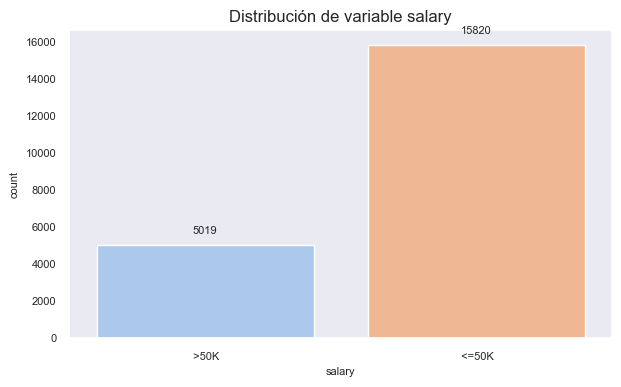

In [ ]:
# Distribución de variable salary
fig, ax = plt.subplots(figsize=(7,4),nrows=1)
sns.countplot(x = 'salary', data=data_train, palette="pastel", ax = ax)

# Añadir recuentos encima de cada barra
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center',
                va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

ax.set_title('Distribución de variable salary')
plt.show()

In [ ]:
import pandas as pd
from collections import Counter

# Contar el número de ejemplos en cada clase
counter = Counter(data_train['salary'])

# Imprimir el número de ejemplos en cada clase
for k,v in counter.items():
    per = v / len(data_train['salary']) * 100
    print('Clase=%s, Cantidad=%d, Porcentaje=%.3f%%' % (k, v, per))


Clase= >50K, Cantidad=5019, Porcentaje=24.085%
Clase= <=50K, Cantidad=15820, Porcentaje=75.915%


## 1.3. Se trata de un problema de clasificación desbalanceado?

Se puede considerar que se trata de un problema de clasificación desbalanceado. En tu conjunto de datos, la clase ‘>50K’ representa aproximadamente el 24.085% de los datos, mientras que la clase ‘<=50K’ representa aproximadamente el 75.915%. Esta es una diferencia significativa, y los algoritmos de aprendizaje automático pueden tener dificultades para aprender de la clase minoritaria debido a su representación limitada.

## 1.4. Cuáles atributos son continuos y cuáles son categóricos?

In [ ]:
#atributos
print(data_train.columns)
class_column = 'salary'

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')


In [ ]:
pd.DataFrame(data_train).dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
salary            object
dtype: object

Atributos continuos: age, fnlwgt, education-num, capital-gain, capital-loss, hours-per-week

Atributos categóricos: workclass, education, marital-status, occupation, relationship, race, sex, native-country, salary

## 1.5. Puede atribuir una semántica (significado) a cada variable?

Se puede atribuir una semántica (significado) a cada variable, excepto al atributo: fnlwgt, que no queda claro el significado. En alguna bibliografía sugieren que puede ser "peso final de la observación", un peso asignado a cada observación en el conjunto de datos. No representa una cantidad medible, sino que es más bien un peso asignado a cada observación en el conjunto de datos. Por lo tanto, puede requerir un tratamiento especial al construir el modelo de predicción de salarios.

## 1.6. Existen datos faltantes? Se concentran en algún atributo?

In [ ]:
data_train_df= data_train.dropna()
# Verificar si hay valores NaN en el DataFrame
nan_values = data_train_df.isna().sum()

# Filtrar las columnas con valores NaN (si es necesario)
columns_with_nan = nan_values[nan_values > 0]

if columns_with_nan.empty:
    print("No hay valores NaN en el DataFrame.")
else:
    print("Columnas con valores NaN:")
    print(columns_with_nan)

No hay valores NaN en el DataFrame.


In [ ]:
# Verificar el porcentaje de valores nulos en el conjunto de datos
null_values=data_train.isna().sum()
total_shells=np.product(data_train.shape)
total_missing_values=null_values.sum()
percentage_missing_values=(total_missing_values/total_shells)*100
print(f'El data set contiene {percentage_missing_values} por ciento de los valores')

El data set contiene 0.0 por ciento de los valores


In [ ]:
# Comprobando los valores duplicados en el conjunto de datos
duplicate=data_train.duplicated().sum()
print(f'Hay {duplicate} valores duplicados (filas) en el conjunto de datos')
cant_filas_antes=data_train.shape[0]

Hay 13 valores duplicados (filas) en el conjunto de datos


In [ ]:
# Se eliminan las filas duplicadas
data_train = data_train.drop_duplicates()
cant_filas_despues=data_train.shape[0]
dif=cant_filas_antes-cant_filas_despues
print(f'Se eliminaron {dif}(filas) en el conjunto de datos')
print("Filas antes  :", cant_filas_antes)
print("Filas después:", cant_filas_despues)

Se eliminaron 13(filas) en el conjunto de datos
Filas antes  : 20839
Filas después: 20826


In [ ]:
#print missing
print(data_train.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64


In [ ]:
# Los datos contienen información no deseada que nos gustaría eliminar y agregar nuevos valores en las columnas particulares.
data_train['native-country'].value_counts().head(3)

 United-States    18674
 Mexico             406
 ?                  394
Name: native-country, dtype: int64

In [ ]:
# sobre el conjunto de datos
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20826 entries, 0 to 20838
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             20826 non-null  int64 
 1   workclass       20826 non-null  object
 2   fnlwgt          20826 non-null  int64 
 3   education       20826 non-null  object
 4   education-num   20826 non-null  int64 
 5   marital-status  20826 non-null  object
 6   occupation      20826 non-null  object
 7   relationship    20826 non-null  object
 8   race            20826 non-null  object
 9   sex             20826 non-null  object
 10  capital-gain    20826 non-null  int64 
 11  capital-loss    20826 non-null  int64 
 12  hours-per-week  20826 non-null  int64 
 13  native-country  20826 non-null  object
 14  salary          20826 non-null  object
dtypes: int64(6), object(9)
memory usage: 2.5+ MB


In [ ]:
data_train['native-country']=data_train['native-country'].str.replace('?','others')
data_train['workclass']=data_train['workclass'].str.replace('?','others')
data_train['occupation']=data_train['occupation'].str.replace('?','others')

In [ ]:
data_train

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,37,Private,147258,9th,5,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,50,United-States,>50K
1,45,Private,357540,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,2002,55,United-States,<=50K
2,36,State-gov,177064,Some-college,10,Never-married,Exec-managerial,Unmarried,White,Female,0,0,40,United-States,<=50K
3,50,Private,301024,Bachelors,13,Separated,Sales,Not-in-family,White,Male,0,0,40,United-States,>50K
4,31,Private,213750,Some-college,10,Never-married,Sales,Not-in-family,White,Male,0,0,45,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20834,28,Private,189241,11th,7,Married-civ-spouse,Handlers-cleaners,Own-child,White,Male,0,0,40,United-States,<=50K
20835,17,Private,159299,11th,7,Never-married,Other-service,Own-child,White,Female,0,0,20,United-States,<=50K
20836,55,others,136819,Bachelors,13,Married-civ-spouse,others,Husband,White,Male,0,0,40,United-States,<=50K
20837,70,others,147558,Bachelors,13,Divorced,others,Not-in-family,White,Female,0,0,7,United-States,<=50K


## 1.7. Cómo se distribuyen los atributos continuos? Existen outliers?

In [ ]:
continuous_features = ['age', 'capital-gain', 'capital-loss', 'hours-per-week']

['age' 'workclass' 'fnlwgt' 'education' 'education-num' 'marital-status'
 'occupation' 'relationship' 'race' 'sex' 'capital-gain' 'capital-loss'
 'hours-per-week' 'native-country' 'salary']


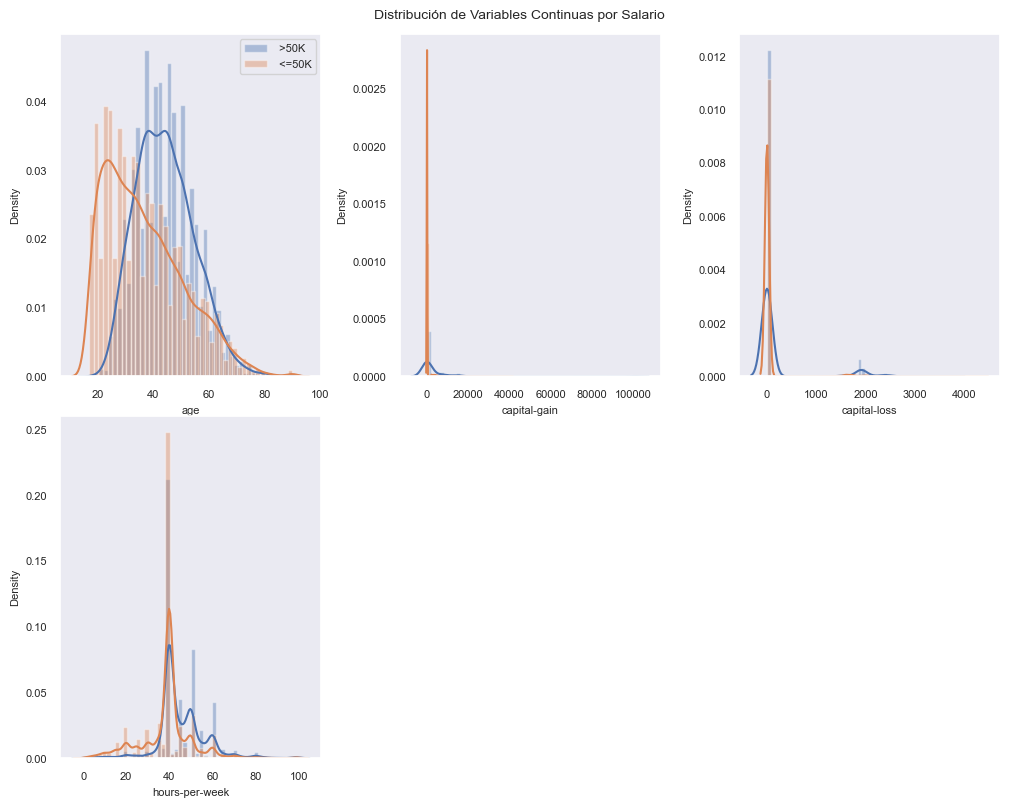

In [ ]:
print(data_train.columns.values)

# Variables continuas
cont_predictors_names = ['age', 'capital-gain', 'capital-loss', 'hours-per-week']

fig, axes = plt.subplots(figsize=(10,8), nrows=2, ncols=3)
fig.suptitle('Distribución de Variables Continuas por Salario', fontsize=10)
fig.tight_layout()
fig.subplots_adjust(wspace=0.30)
for i, column in enumerate(cont_predictors_names):
    #print(i//3, i%3)
    for salary in data_train['salary'].unique():
      target = data_train.loc[data_train['salary'] == salary]
      sns.distplot(target[column], hist=True, rug=False, kde=True,
                   ax=axes[i//3,i%3], label=salary)
      if i==0:
        axes[0,0].legend(prop={'size': 8})

axes[-1,-2].axis('off')
axes[-1,-1].axis('off')
plt.show()

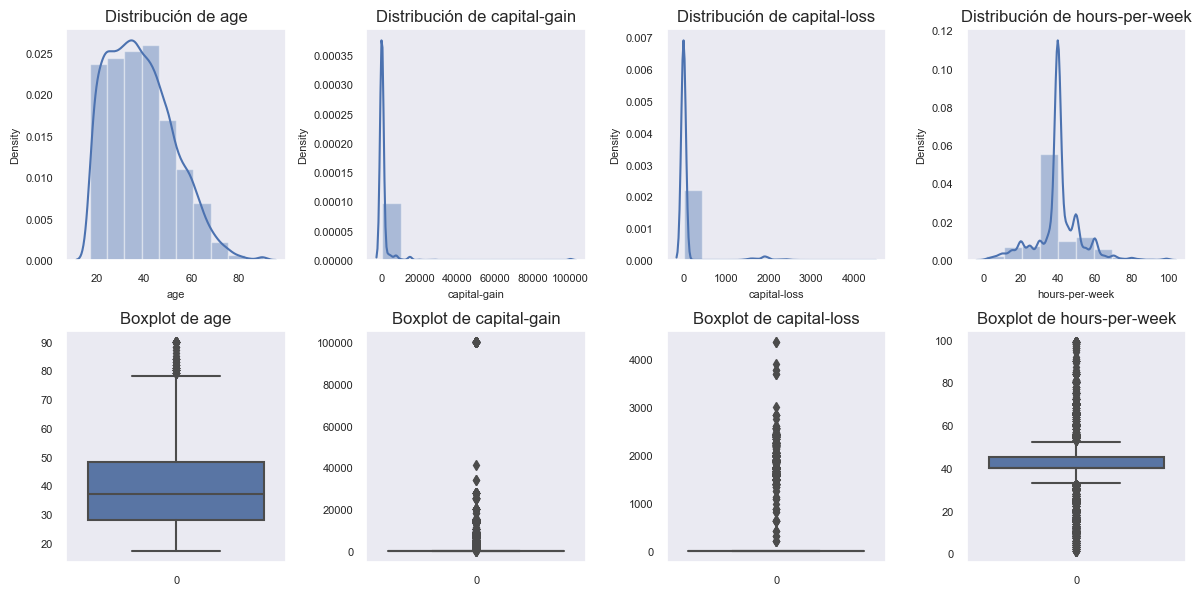

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

cont_columns = ['age', 'capital-gain', 'capital-loss', 'hours-per-week']

fig, axes = plt.subplots(figsize=(12, 6), nrows=2, ncols=4)

for i, cont_column in enumerate(cont_columns):
    sns.distplot(data_train[cont_column], hist=True, rug=False, kde=True, bins=10, ax=axes[0, i])
    sns.boxplot(data_train[cont_column], ax=axes[1, i])
    axes[0, i].set_title(f'Distribución de {cont_column}')
    axes[1, i].set_title(f'Boxplot de {cont_column}')

plt.tight_layout()
plt.show()

Teniendo en cuenta que los valores atípicos (outilers en inglés) son aquellos puntos que están más allá del límite inferior o superior, existen valores atípicos en todos los atributos continuos

## 1.8. Cómo se distribuyen los atributos categóricos?

In [ ]:
categorical_features = ['workclass', 'education', 'marital-status',  'occupation', 'relationship', 'race',  'sex',  'native-country']

### Clase Laboral por Salario y Educación por salario

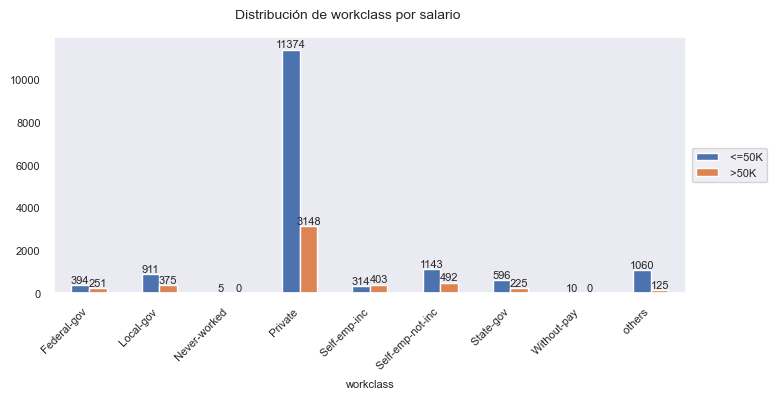

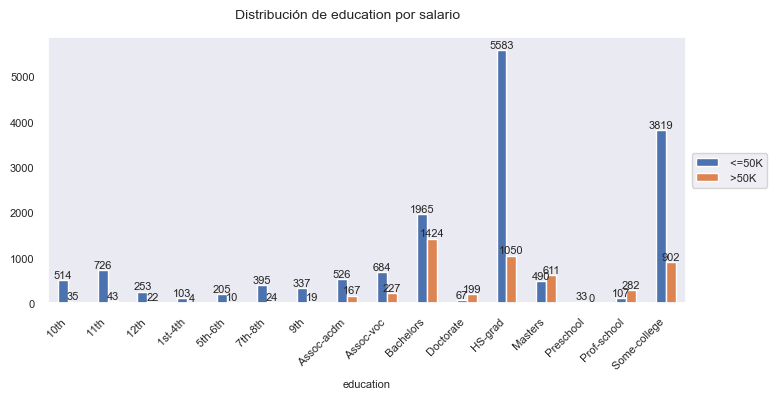

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

cat_predictors_A = ['workclass', 'education']

# Crear subgráficos individuales para cada variable categórica
for i, column in enumerate(cat_predictors_A):
    # Crear una nueva figura para cada variable categórica
    fig, ax = plt.subplots(figsize=(7, 4))
    fig.suptitle(f'Distribución de {column} por salario', fontsize=10)

    # Agrupar por la variable categórica y 'salary'
    df_gb = data_train.groupby([column, 'salary']).size().unstack(level=1)

    # Graficar el gráfico de barras
    bars = df_gb.plot(kind='bar', ax=ax)

    # Añadir etiquetas a cada barra sin decimales
    for bar in bars.patches:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval + 5, f'{int(yval)}', ha='center', va='bottom')

    # Ajustar la posición de la leyenda
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 8})

    # Inclinar las etiquetas del eje x
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

    plt.tight_layout()
    plt.show()


### Estado Civil por salario, y Ocupación por salario

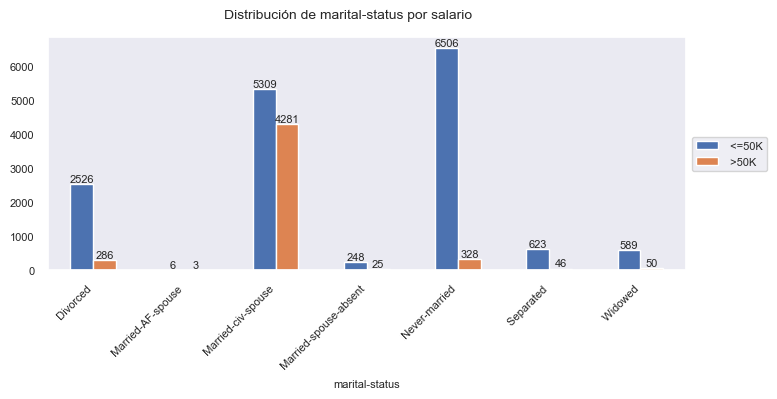

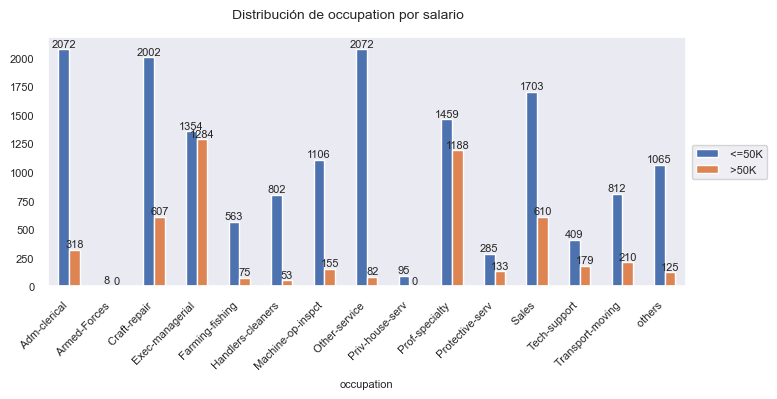

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

cat_predictors_B = ['marital-status','occupation']

# Crear subgráficos individuales para cada variable categórica
for i, column in enumerate(cat_predictors_B):
    # Crear una nueva figura para cada variable categórica
    fig, ax = plt.subplots(figsize=(7, 4))
    fig.suptitle(f'Distribución de {column} por salario', fontsize=10)

    # Agrupar por la variable categórica y 'salary'
    df_gb = data_train.groupby([column, 'salary']).size().unstack(level=1)

    # Graficar el gráfico de barras
    bars = df_gb.plot(kind='bar', ax=ax)

    # Añadir etiquetas a cada barra
    for bar in bars.patches:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval + 5, f'{int(yval)}', ha='center', va='bottom')

    # Ajustar la posición de la leyenda
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 8})

    # Inclinar las etiquetas del eje x
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

    plt.tight_layout()
    plt.show()

### Relación familiar por salario, y Raza por salario

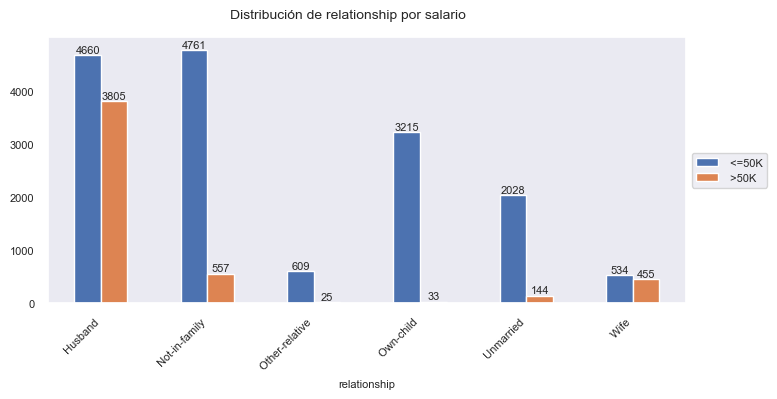

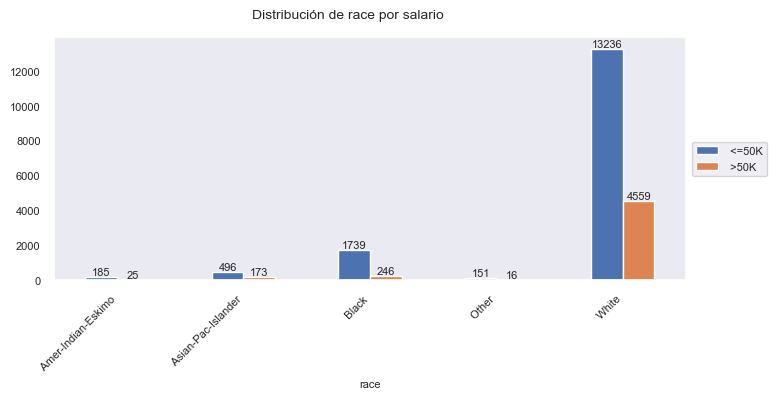

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

cat_predictors_C = ['relationship', 'race']

# Crear subgráficos individuales para cada variable categórica
for i, column in enumerate(cat_predictors_C):
    # Crear una nueva figura para cada variable categórica
    fig, ax = plt.subplots(figsize=(7, 4))
    fig.suptitle(f'Distribución de {column} por salario', fontsize=10)

    # Agrupar por la variable categórica y 'salary'
    df_gb = data_train.groupby([column, 'salary']).size().unstack(level=1)

    # Graficar el gráfico de barras
    bars = df_gb.plot(kind='bar', ax=ax)

    # Añadir etiquetas a cada barra
    for bar in bars.patches:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval + 5, round(yval, 2), ha='center', va='bottom')

    # Ajustar la posición de la leyenda
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 8})

    # Inclinar las etiquetas del eje x
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

    plt.tight_layout()
    plt.show()

### Género por salario.

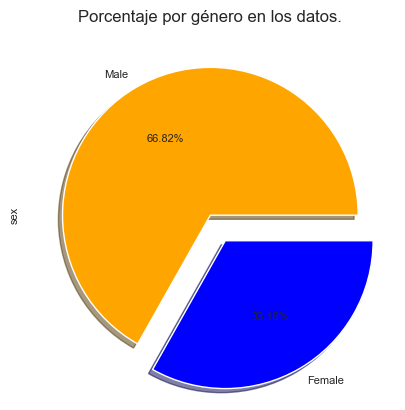

In [ ]:
# Encontremos el porcentaje del género en el conjunto de datos usando el chat circular.
data_train['sex'].value_counts().plot(kind='pie',
    explode=[0,0.2],
    labels=['Male','Female'],
    colors=['orange','blue'],
    autopct='%1.2f%%',
    shadow=True,
        )
plt.title("Porcentaje por género en los datos.")
plt.show()

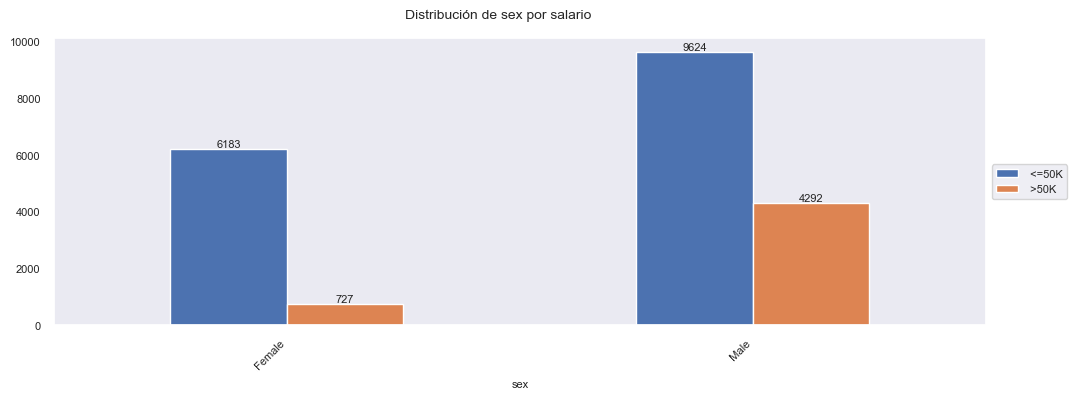

In [ ]:
import matplotlib.pyplot as plt

cat_predictors_D = ['sex']

# Crear subgráficos individuales para cada variable categórica
for i, column in enumerate(cat_predictors_D):
    # Crear una nueva figura para cada variable categórica
    fig, ax = plt.subplots(figsize=(10, 4))
    fig.suptitle(f'Distribución de {column} por salario', fontsize=10)

    # Agrupar por la variable categórica y 'salary'
    df_gb = data_train.groupby([column, 'salary']).size().unstack(level=1)

    # Graficar el gráfico de barras
    bars = df_gb.plot(kind='bar', ax=ax)

    # Añadir etiquetas a cada barra sin comas y redondeando a dos decimales
    for bar in bars.patches:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval + 5, '{:.0f}'.format(yval), ha='center', va='bottom')

      # Ajustar la posición de la leyenda
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 8})

    # Inclinar las etiquetas del eje x
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

    plt.tight_layout()
    plt.show()


### País de Nacimiento por salario

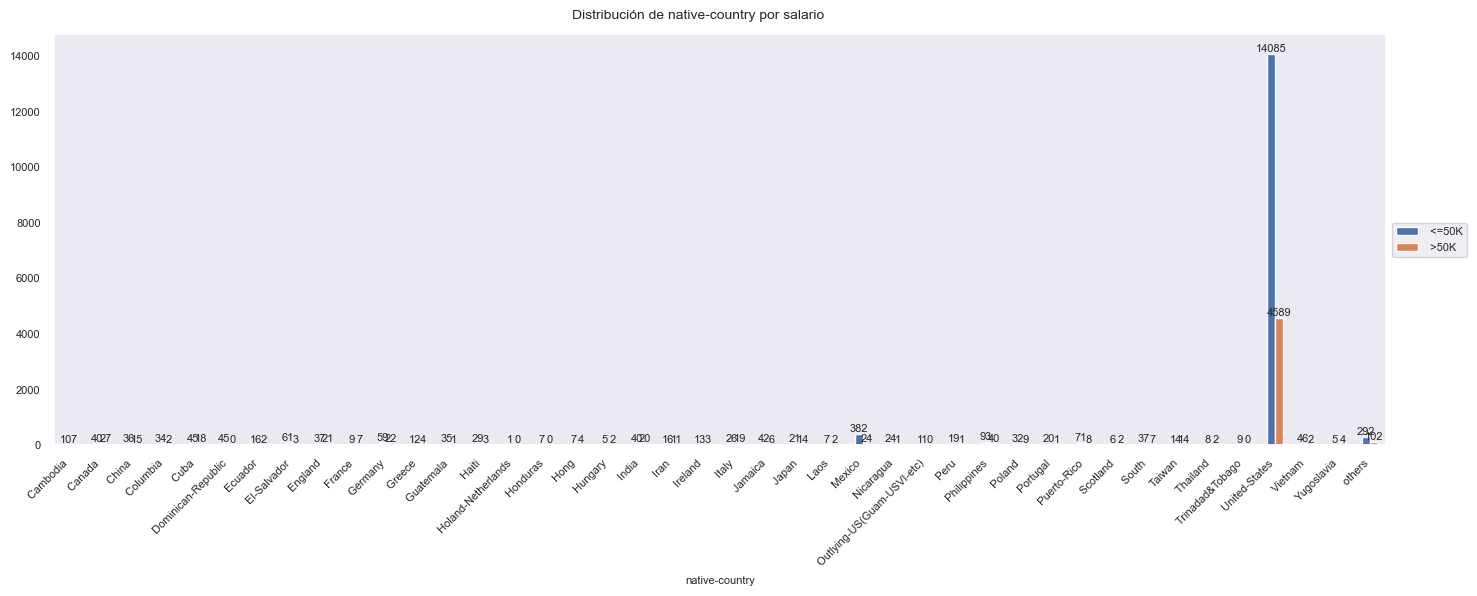

In [ ]:
import matplotlib.pyplot as plt

cat_predictors_D = ['native-country']

# Crear subgráficos individuales para cada variable categórica
for i, column in enumerate(cat_predictors_D):
    # Crear una nueva figura solo para 'native-country'
    if column == 'native-country':
        fig, ax = plt.subplots(figsize=(14, 6))
        fig.suptitle(f'Distribución de {column} por salario', fontsize=10)

        # Filtrar el DataFrame para excluir países con cantidad 0
        df_filtered = data_train[data_train[column] != ' ?']

        # Agrupar por la variable categórica y 'salary'
        df_gb = df_filtered.groupby([column, 'salary']).size().unstack(level=1)

        # Graficar el gráfico de barras
        bars = df_gb.plot(kind='bar', ax=ax)

        # Añadir etiquetas a cada barra sin comas
        for bar in bars.patches:
            yval = bar.get_height()
            ax.text(bar.get_x() + bar.get_width() / 2, yval + 5, '{:.0f}'.format(yval), ha='center', va='bottom')

        # Ajustar la posición de la leyenda
        box = ax.get_position()
        ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
        ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 8})

        # Inclinar las etiquetas del eje x
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

        plt.tight_layout()
        plt.show()


#### 20 países principales en la data por salario

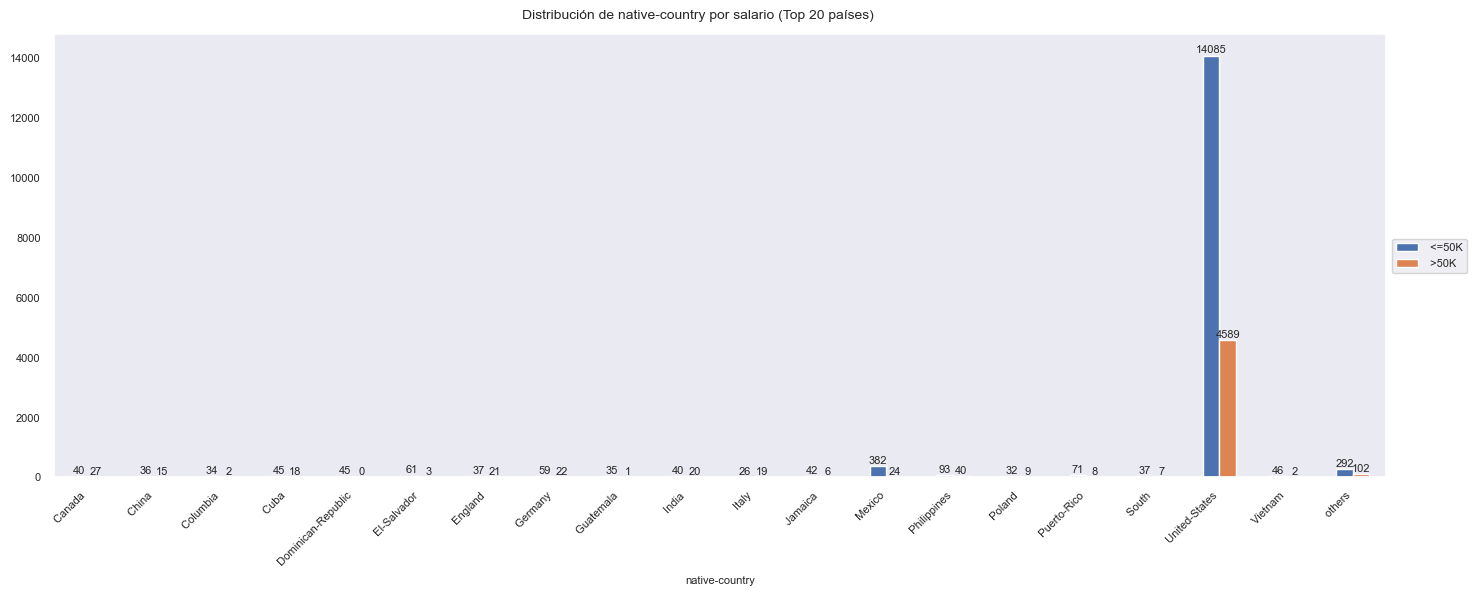

In [ ]:
import matplotlib.pyplot as plt

cat_predictors_D2 = ['native-country']

# Crear subgráficos individuales para 'native-country'
for i, column in enumerate(cat_predictors_D2):
    if column == 'native-country':
        # Filtrar el DataFrame para excluir países con cantidad 0
        df_filtered = data_train[data_train[column] != ' ?']

        # Agrupar por la variable categórica y 'salary'
        df_gb = df_filtered.groupby([column, 'salary']).size().unstack(level=1)

        # Calcular la cantidad total por país
        df_country_counts = df_gb.sum(axis=1).reset_index(name='total_cantidad')

        # Seleccionar los primeros 20 países con mayor cantidad
        top_20_countries = df_country_counts.nlargest(20, 'total_cantidad')

        # Filtrar el DataFrame original para incluir solo los primeros 20 países
        df_filtered_top_20 = df_filtered[df_filtered['native-country'].isin(top_20_countries['native-country'])]

        # Crear una nueva figura
        fig, ax = plt.subplots(figsize=(14, 6))
        fig.suptitle(f'Distribución de {column} por salario (Top 20 países)', fontsize=10)

        # Agrupar por el nuevo DataFrame y 'salary'
        df_gb_top_20 = df_filtered_top_20.groupby(['native-country', 'salary']).size().unstack(level=1)

        # Graficar el gráfico de barras
        bars = df_gb_top_20.plot(kind='bar', ax=ax)

        # Añadir etiquetas a cada barra sin comas
        for bar in bars.patches:
            yval = bar.get_height()
            ax.text(bar.get_x() + bar.get_width() / 2, yval + 5, '{:.0f}'.format(yval), ha='center', va='bottom')

        # Ajustar la posición de la leyenda
        box = ax.get_position()
        ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
        ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop={'size': 8})

        # Inclinar las etiquetas del eje x
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

        plt.tight_layout()
        plt.show()

In [ ]:
data_train_a = data_train

# P2. Exploratorio II y Codificación

In [ ]:
data_train = data_train_large

Expanda su análisis anterior para determinar a nivel explorartorio qué variables podrían ser más útiles para predecir la variable de interés.

2.1.   Utilice alguna técnica visual que le permita examinar la relevancia de cada predictor.

2.2.   Utilice alguna técnica de filtrado individual que le permita examinar la relevancia de cada predictor.

2.3.   Razone sobre las limitaciones de las técnicas empleadas.


## 2.1. Técnicas visuales que permitan examinar la relevancia de cada predictor.

### Matriz de Correlación

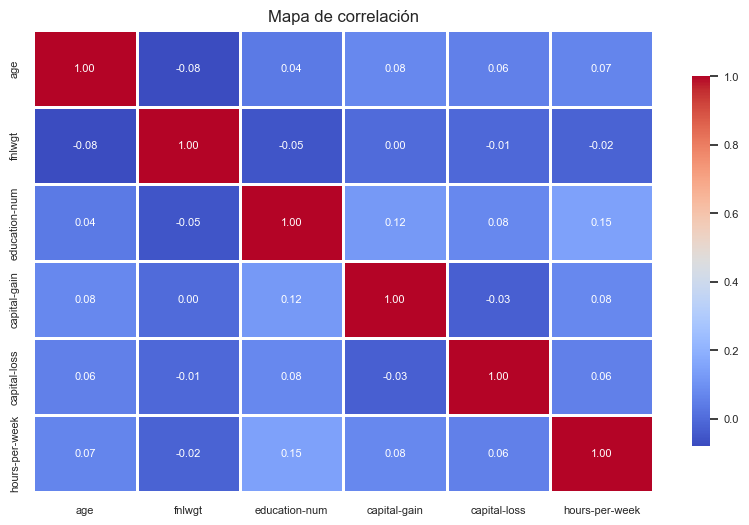

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Comprobando la matriz de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(data_train.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=1, linecolor='white', cbar_kws={"shrink": 0.8})
plt.title("Mapa de correlación")
plt.show()

### Relación de la edad con Clase Laboral, Educación, Estado civil, Ocupación, Relación familiar y Raza

#### Diagrama de caja

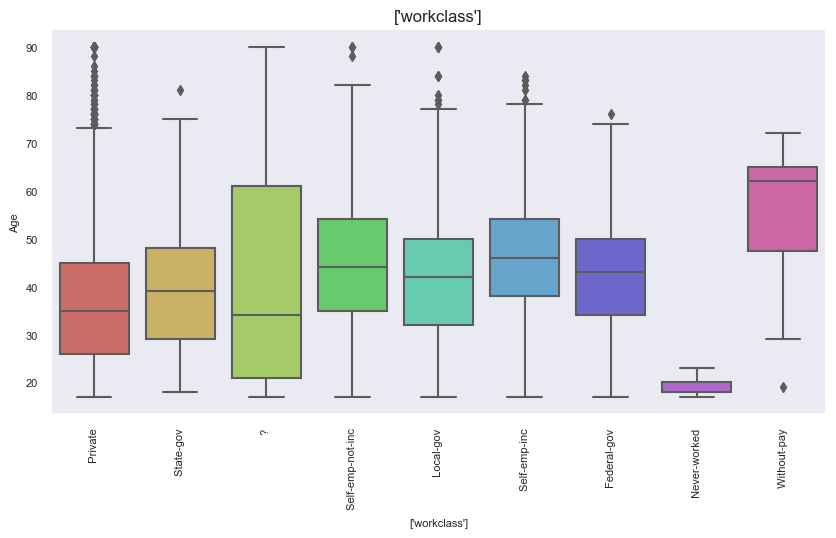

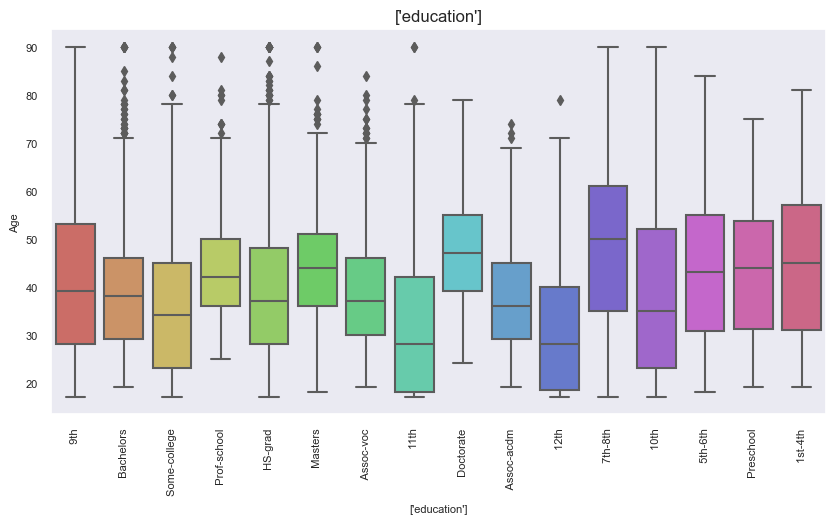

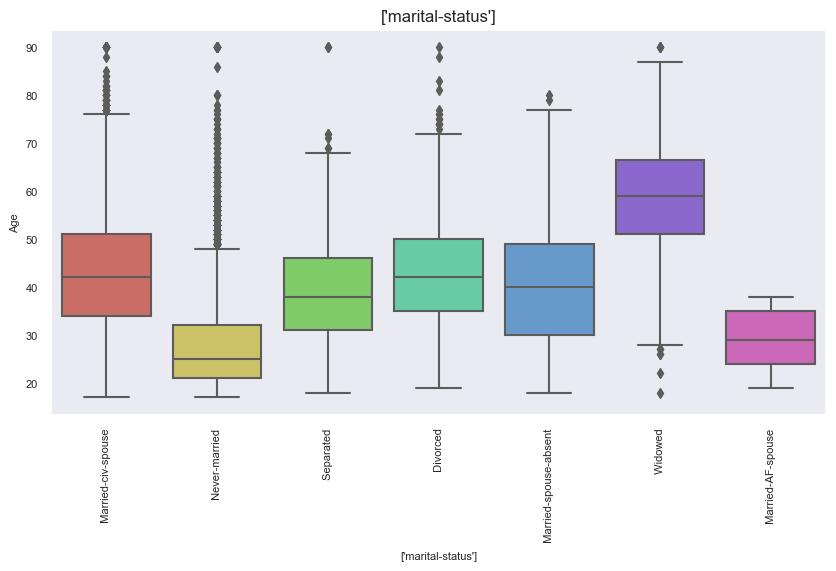

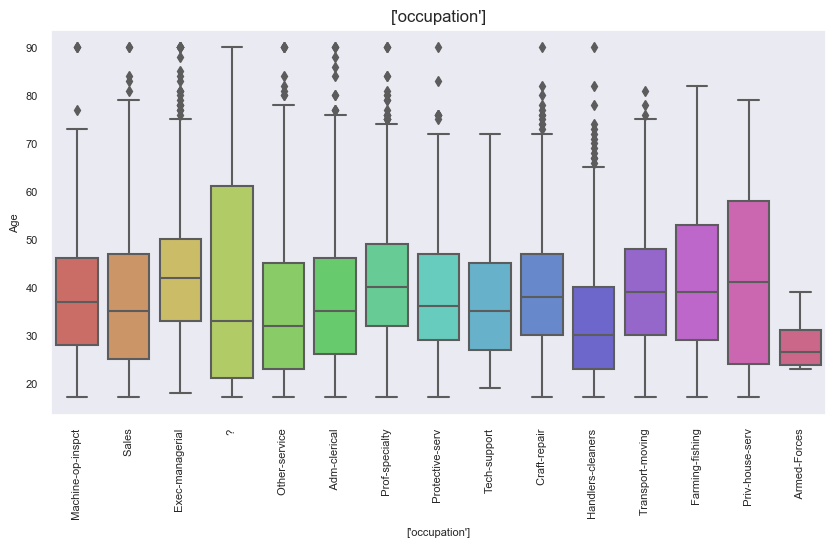

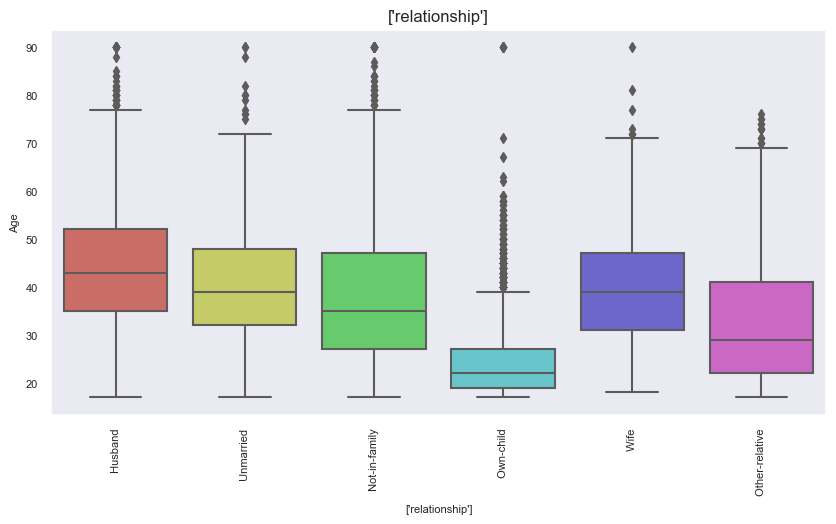

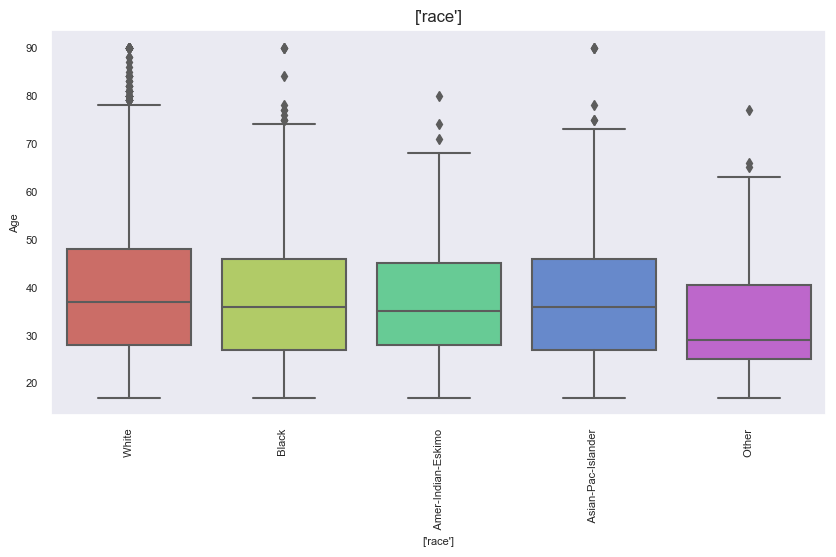

In [ ]:
# Crear un diagrama de caja para la columna numérica con la edad
for i in ['workclass','education','marital-status','occupation','relationship','race']:
    plt.figure(figsize=(10,5))
    sns.boxplot(data=data_train,x=data_train[i],y='age',palette='hls')
    plt.title([i])
    plt.xlabel([i])
    plt.xticks(rotation=90)
    plt.ylabel('Age')
    plt.show()

#### Gráfico de violín

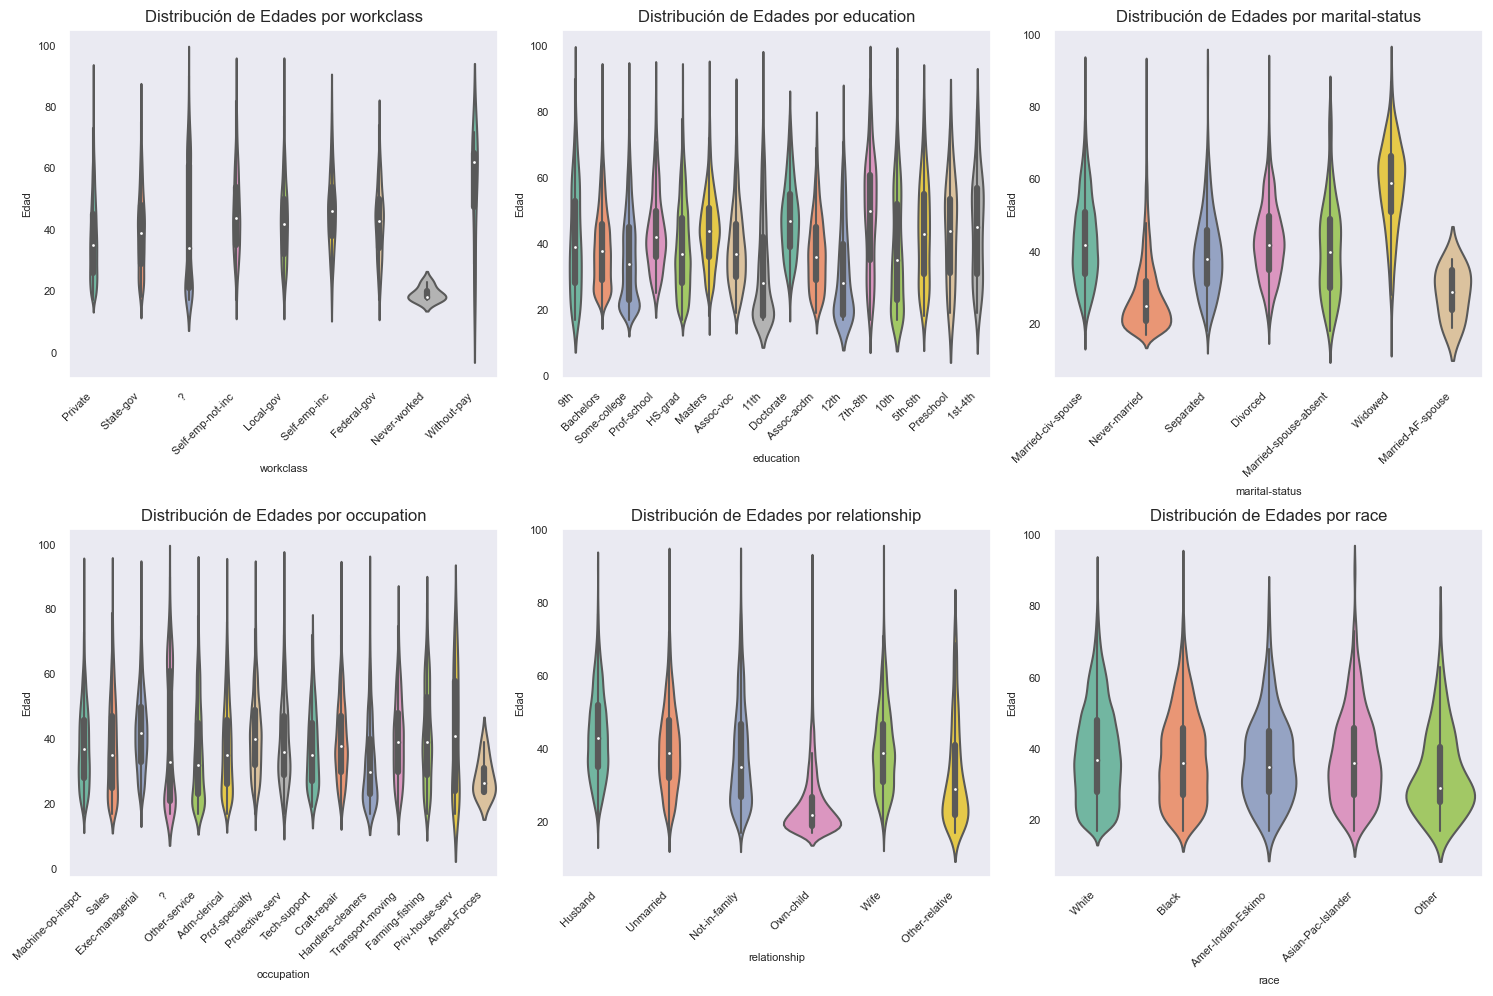

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lista de variables categóricas
categorical_variables = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race']

# Configuración del tamaño del gráfico
plt.figure(figsize=(15, 10))

# Bucle para crear un gráfico de violín para cada variable categórica
for i, variable in enumerate(categorical_variables, 1):
    plt.subplot(2, 3, i)
    sns.violinplot(data=data_train, x=variable, y='age', palette='Set2')
    plt.title(f'Distribución de Edades por {variable}')
    plt.xlabel(variable)
    plt.ylabel('Edad')
    plt.xticks(rotation=45, ha='right')  # Inclinar las etiquetas del eje x

# Ajustes de diseño
plt.tight_layout()
plt.show()


### Relación familiar por Raza

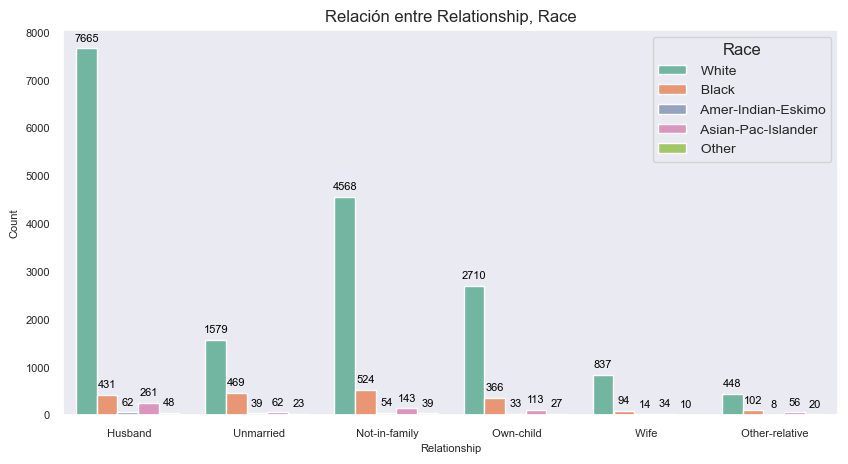

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

# Gráfico de barras apiladas para 'relationship' con diferentes colores para 'race'
ax = sns.countplot(x='relationship', hue='race', data=data_train, palette='Set2')

# Añadir el valor de cada barra en el gráfico
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')

# Ajustar leyenda y etiquetas
plt.legend(title='Race', title_fontsize='12')
plt.title('Relación entre Relationship, Race')
plt.xlabel('Relationship')
plt.ylabel('Count')

plt.show()

### Relación familiar por Género

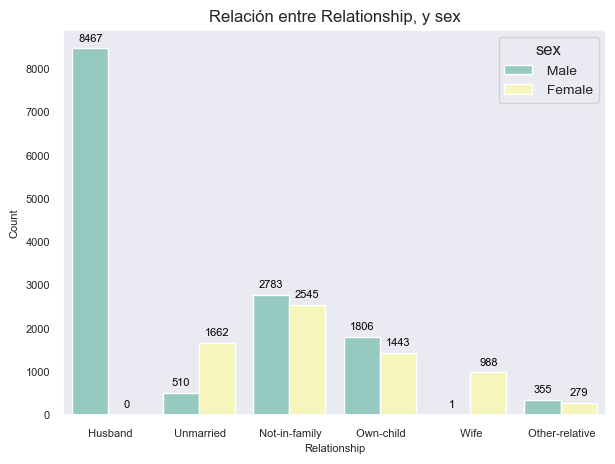

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(7, 5))

# Gráfico de barras apiladas para 'relationship' con diferentes colores para 'race' y 'sex'
ax = sns.countplot(x='relationship', hue='sex', data=data_train, palette='Set3')

# Añadir el valor de cada barra en el gráfico
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')


# Ajustar leyenda y etiquetas
plt.legend(title='sex', title_fontsize='12')
plt.title('Relación entre Relationship, y sex')
plt.xlabel('Relationship')
plt.ylabel('Count')

plt.show()

### Por ciento de Relación Familiar, Raza y Género

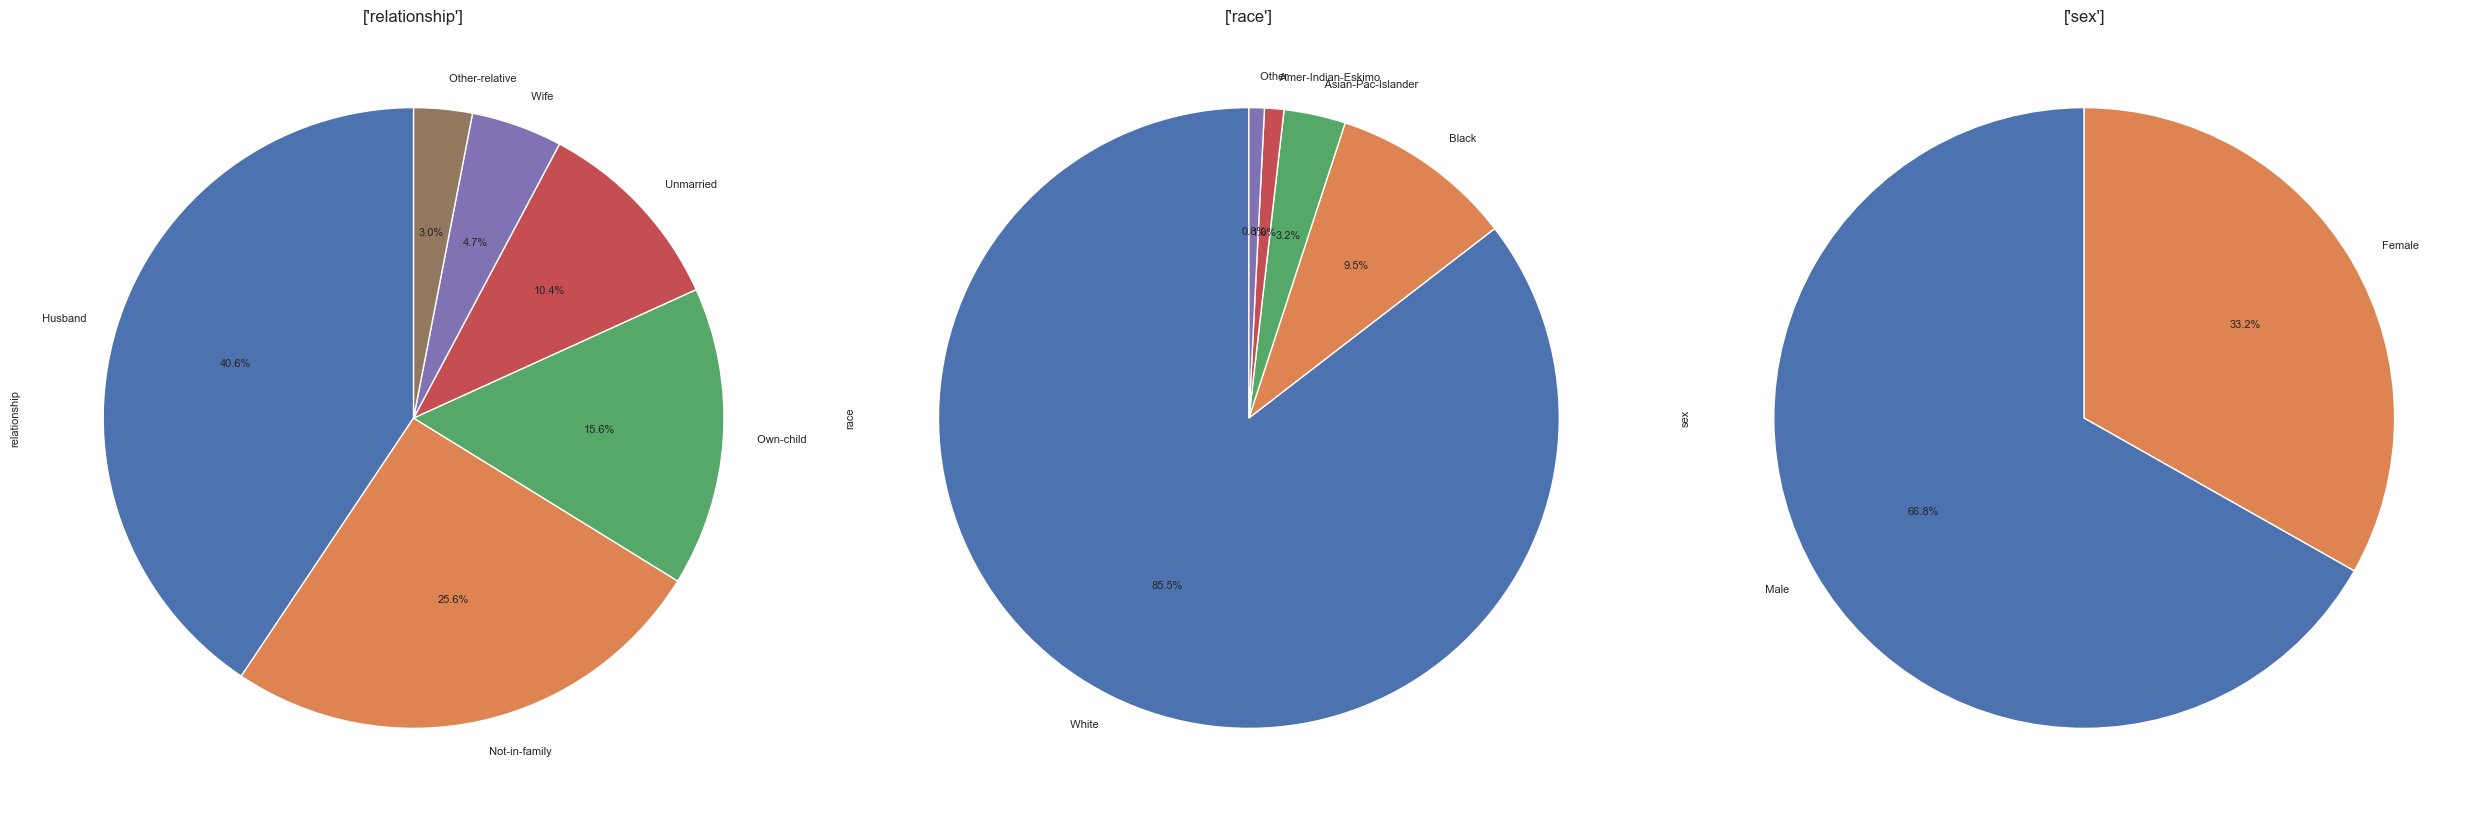

In [ ]:
# gráfico para comprender las relaciones, la raza y el porcentaje de sexo con columnas de salida
another_list=['relationship','race','sex']
num_of_columns=len(another_list)
plt.figure(figsize=(25,8))
for i, col in enumerate(another_list):
    plt.subplot(1,num_of_columns,i+1)
    data_train[col].value_counts().plot(kind='pie',autopct='%1.1f%%', startangle=90)
    plt.title([col])
plt.tight_layout()
plt.show()

### Por ciento de Clase laboral, Educación y Estado civil

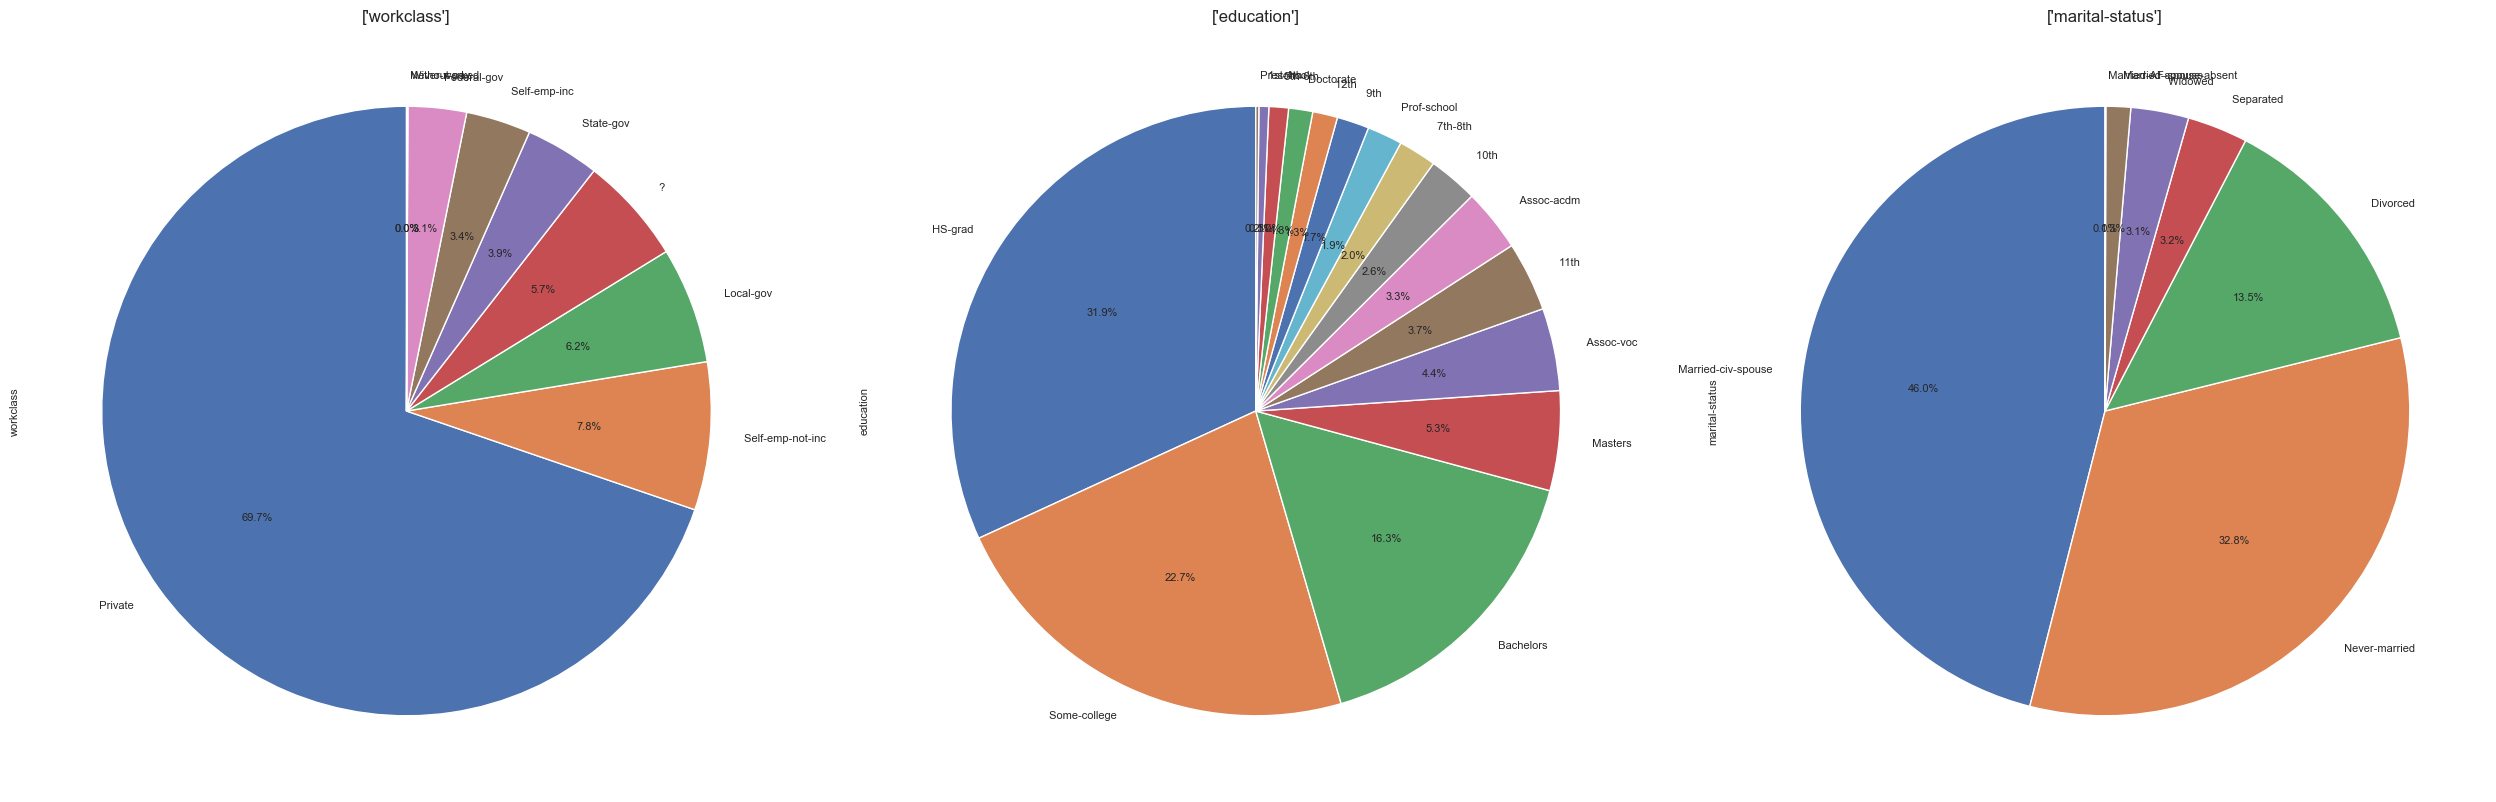

In [ ]:
# Gráfico circular para comprender el porcentaje de la clase laboral, la educación y el estado civil con columnas de salida
work_place=['workclass','education','marital-status']
num_column=len(work_place)
plt.figure(figsize=(25,8))
for i,col in enumerate(work_place):
    plt.subplot(1,num_column,i+1)
    data_train[col].value_counts().plot(kind='pie',autopct='%1.1f%%', startangle=90)
    plt.title([col])
plt.tight_layout()
plt.show()

### Educación en Estados Unidos, país con mayor cantidad de personas con salario mayor a 50 mil

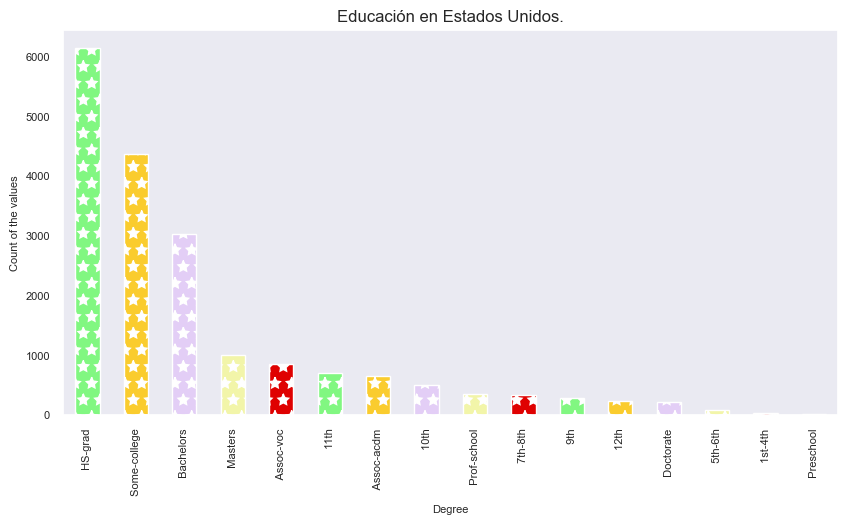

In [ ]:
# condición diferente a los datos para crear un marco de datos separado para Estados Unidos y menos de 40 horas por semana.
usa=data_train[data_train['native-country']==' United-States']
# cuál es la educación en estados unidos
usa['education'].value_counts().sort_values(ascending=False)\
.plot(kind='bar',figsize=(10,5),hatch='*',color=['#81F781','#FACC2E','#E3CEF6','#F2F5A9','#DF0101'])
plt.title("Educación en Estados Unidos.")
plt.xlabel("Degree")
plt.ylabel("Count of the values")
plt.show()

## 2.2. Técnicas de filtrado individual que permiten examinar la relevancia de cada predictor.

### Puntuación de información mutua

Se usa para evaluar la relación entre cada variable categórica y la variable objetivo, relacionada con la tarea de clasificación (mutual_info_classif). Luego, visualiza estas puntuaciones en un gráfico de barras horizontal para proporcionar una representación visual de la importancia relativa de cada variable categórica en relación con la variable objetivo.

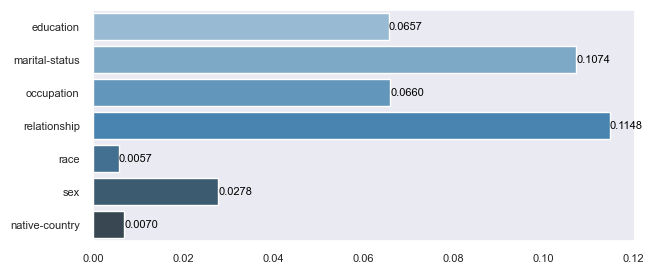

In [ ]:
from sklearn.feature_selection import mutual_info_classif as mi
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Variables categóricas que se analizarán
cat_predictors = ['education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

# Lista para almacenar las puntuaciones de información mutua
scores = []

# Bucle para calcular la información mutua para cada variable categórica
for pred in cat_predictors:
    # Convertir la variable objetivo a formato numérico
    y = LabelEncoder().fit_transform(data_train[class_column]).reshape(-1, 1)
    # Convertir la variable categórica actual a formato numérico
    x = LabelEncoder().fit_transform(data_train[pred]).reshape(-1, 1)
    # Calcular la puntuación de información mutua y agregarla a la lista
    score = mi(x, y, discrete_features=True)[0]
    scores.append(score)

# Crear una figura y un eje para el gráfico
fig, axes = plt.subplots(figsize=(7, 3), nrows=1, ncols=1)

# Datos para el gráfico de barras
plot_data = {'x': cat_predictors, 'y': scores}

# Crear un gráfico de barras horizontales usando seaborn
p = sns.barplot(data=plot_data, x='y', y='x', palette="Blues_d", ax=axes)

# Agregar valores de información mutua en las barras
for i, score in enumerate(scores):
    p.text(score, i, f'{score:.4f}', ha='left', va='center', color='black', fontsize=8)

# Mostrar el gráfico
plt.show()

Las técnicas de filtrado individual son métodos que evalúan la relación de cada predictor con la variable objetivo de forma independiente, sin tener en cuenta la interacción con otros predictores.

Además en los acápites siguientes se usaron técnicas de filtrado individual que permitieron examinar la relevancia de cada predictor

* 1.7: En Distribución de atributos continuos por Salario, se generó un conjunto de subgráficos (subplots) organizados en filas y columnas. Este tipo de disposición se llama "subplot grid", y se trazan histogramas con estimaciones de densidad de kernel (Kernel Density Estimation - KDE). Cada subgráfico representa la distribución de una variable continua ('age', 'capital-gain', 'capital-loss' o 'hours-per-week') dividida por la variable objetivo ('salary').

* 1.8: En Distribución de atributos categóricos por Salario, se generó un conjunto de gráficos de barras (bar plots) que representan la distribución de las categorías de una variable categórica en función de la variable objetivo 'salary'. Específicamente, es un conjunto de gráficos de barras apiladas, donde cada barra representa una categoría de la variable categórica y está dividida por el valor de 'salary' (por ejemplo, "<=50K" y ">50K")

2.3. Limitaciones de las técnicas de filtrado individual.

Las técnicas de filtrado individual tienen ciertas limitaciones que es importante tener en cuenta:

* **Ignoran Interacciones entre Variables**: evalúan la relevancia de cada variable de forma individual y no consideran posibles interacciones o relaciones entre variables. Pueden perder patrones importantes que solo se manifiestan cuando se examinan combinaciones de variables.

* **Sensibilidad al Ruido**: Son sensibles al ruido en los datos.

* **No Consideran Características Combinadas**: No evalúan la relevancia de características combinadas o transformaciones de características, lo que podría ser crucial en algunos contextos.

* **Dependen del Tipo de Problema**: La relevancia de las variables puede depender del tipo de problema (clasificación, regresión, etc.). Una variable puede ser relevante para un problema pero no para otro.

* **No Manejan Bien Variables Correlacionadas**: Si hay variables altamente correlacionadas, la técnica puede seleccionar solo una de ellas y perder información importante.

* **No Consideran Contexto del Dominio**: No tienen en cuenta el conocimiento del dominio o la interpretabilidad del modelo. Algunas variables pueden ser importantes en un contexto específico que la técnica no capta.

* **Dependencia de la Escala**: Algunas técnicas pueden ser sensibles a la escala de las variables. La magnitud de las variables puede influir en la evaluación de su importancia.

* **Problemas con Variables Categóricas**: En el caso de variables categóricas con muchas categorías, algunas técnicas pueden tener dificultades para evaluar su relevancia correctamente.

* **Dependencia del Algoritmo Utilizado**: La elección del algoritmo para evaluar la relevancia puede influir en los resultados. Diferentes algoritmos pueden proporcionar evaluaciones distintas.

* **No Manejan Variables Irrelevantes para Todas las Instancias**: Las técnicas de filtrado individual no identifican variables que pueden ser irrelevantes para todas las instancias del conjunto de datos.

# P3. Preparación de los Datos

In [ ]:
data_train = data_train_small

Genere una nueva versión del dataset original pre-procesando adecuadamente los atributos y preparándo los datos para entrenar un modelo de aprendizaje automático.

3.1. Explique brevemente en qué consiste la codificación one-hot de las variables categóricas y argumente sobre la necesidad de aplicarlo antes de entrenar una SVM o un árbol de clasificación.

3.2. Proponga un método para escalar los atributos continuos y razone sobre las ventajas que podría tener sobre métodos alternativos. Refiérase en particular a la diferencia entre normalizar y estandarizar.

3.3. Aplique su método explicando claramente si las estadísticas requeridas para aplicarlo se deben obtener del conjunto de entrenamiento o del conjunto de pruebas.

3.4. Codifique numéricamente la variable a predecir recordando la codificación efectuada.

## 3.1. Codificación one-hot de las variables categóricas y su necesidad de aplicarlo antes de entrenar una SVM o un árbol de clasificación.

La codificación one-hot, también conocida como "dummy encoding" o "binarización", es una técnica utilizada para convertir variables categóricas en un formato que puede ser proporcionado a algoritmos de aprendizaje automático, como SVM (Support Vector Machine) o árboles de clasificación.

Consiste en transformar una variable categórica con k categorías en k nuevas columnas binarias, donde cada columna representa la presencia o ausencia de una categoría específica. Cada observación recibe un "1" en la columna correspondiente a su categoría y "0" en todas las demás columnas. Esto crea una representación numérica de la variable categórica que puede ser interpretada por modelos que requieren datos numéricos, como SVM y árboles de clasificación.

La necesidad de aplicar codificación one-hot antes de entrenar modelos como SVM o árboles de clasificación radica en cómo estos algoritmos manejan las variables de entrada. SVM busca encontrar un hiperplano que mejor separe las clases en el espacio de características. Los árboles de clasificación toman decisiones basadas en reglas sobre los valores de las variables de entrada.

Estos algoritmos no interpretan directamente las variables categóricas en su forma original y podrían malinterpretar el significado de los números asignados a las categorías. La codificación one-hot proporciona una representación sin ambigüedades, donde las relaciones entre las categorías se expresan claramente. Además, evita la introducción de un orden implícito entre las categorías, lo que sería inapropiado en muchos contextos categóricos.

One-hot es esencial para representar adecuadamente las variables categóricas al entrenar modelos como SVM y árboles de clasificación, asegurando que estos algoritmos interpreten correctamente la información categórica y realicen predicciones más precisas.

## 3.2. Método propuesto para escalar los atributos continuos y ventajas que podría tener sobre métodos alternativos. Diferencia entre normalizar y estandarizar.

Para escalar los atributos continuos en el conjunto de datos, se pueden utilizar diferentes métodos, como la normalización y la estandarización.
* **Normalización** (Min-Max Scaling) Escala los valores al rango [0, 1].
Útil cuando se espera que los datos sigan una distribución uniforme.
* **Estandarización** (Z-Score Scaling): Transforma los datos para que tengan una media de 0 y una desviación estándar de 1. Útil cuando se espera que los datos sigan una distribución normal.

En muchos casos, la estandarización (Z-Score Scaling) es preferible, ya que es menos sensible a valores atípicos y se puede utilizar eficazmente en una amplia variedad de distribuciones de datos.
Sin embargo, la elección entre normalización y estandarización también puede depender de los requisitos específicos del modelo o del algoritmo de aprendizaje automático que se va a utilizar. Algunos algoritmos pueden beneficiarse más de datos normalizados, mientras que otros pueden funcionar bien con datos estandarizados.

 **Ventajas de la Estandarización sobre la Normalización**:

* Menos Sensible a Outliers: La estandarización es menos afectada por valores atípicos en los datos en comparación con la normalización.

* Útil para Algoritmos Basados en Distancias: Algoritmos basados en distancias, como k-Nearest Neighbors (k-NN) y Support Vector Machines (SVM), suelen funcionar mejor con datos estandarizados.

En este caso se propone usar **StandardScaler** ya que es menos sensible a valores atípicos y se puede utilizar eficazmente en una amplia variedad de distribuciones de datos

## 3.3. Aplicación del método explicando si las estadísticas requeridas para aplicarlo se deben obtener del conjunto de entrenamiento o del conjunto de pruebas.

Se deben aplicar transformaciones por separado al conjunto de entrenamiento y al de prueba es una práctica estándar para garantizar que el modelo sea robusto y generalice bien a nuevos datos. Esto ayuda a evitar problemas de sobreajuste y proporciona una evaluación más precisa del rendimiento del modelo en situaciones del mundo real.

La razón para hacer esto es mantener la coherencia en la escala de los datos entre el conjunto de entrenamiento y el conjunto de prueba. Al calcular las estadísticas en el conjunto de entrenamiento y luego aplicarlas al conjunto de prueba, se simula cómo se escalarían los datos del conjunto de prueba si fueran parte del conjunto de entrenamiento original.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# Seleccionar las características continuas
continuous_features = ['age', 'capital-gain', 'capital-loss', 'hours-per-week']

# Extraer las características continuas de los conjuntos de datos de entrenamiento y prueba
X_train_encoded = data_train[continuous_features]
X_test_encoded = data_test[continuous_features]

# Realiza la estandarización de las variables continuas en el conjunto de entrenamiento y aplica la misma transformación al conjunto de prueba
continuous_scaler = StandardScaler()
continuous_scaler.fit(X_train_encoded)
X_train_encoded = pd.DataFrame(continuous_scaler.transform(X_train_encoded), columns=continuous_features)
X_test_encoded = pd.DataFrame(continuous_scaler.transform(X_test_encoded), columns=continuous_features)

# Seleccionar las características categóricas
categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

# Codificar las características categóricas utilizando One-Hot Encoding
categorical_encoder = OneHotEncoder(sparse=False)
cat_X_train_encoded = categorical_encoder.fit_transform(data_train[categorical_features])
cat_X_train_encoded = pd.DataFrame(cat_X_train_encoded, columns=categorical_encoder.get_feature_names_out(categorical_features))
X_train_encoded = pd.concat([X_train_encoded, cat_X_train_encoded], axis=1)

cat_X_test_encoded = categorical_encoder.transform(data_test[categorical_features])
cat_X_test_encoded = pd.DataFrame(cat_X_test_encoded, columns=categorical_encoder.get_feature_names_out(categorical_features))
X_test_encoded = pd.concat([X_test_encoded, cat_X_test_encoded], axis=1)

In [ ]:
print(X_train_encoded.shape)
print(X_test_encoded.shape)

(5209, 105)
(6513, 105)


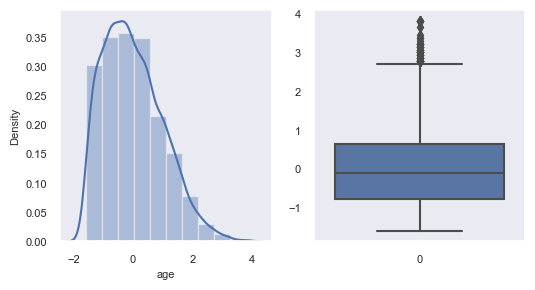

In [ ]:
fig, ax = plt.subplots(figsize=(6,3), nrows=1, ncols=2)
sns.distplot(X_train_encoded['age'], hist=True, rug=False, kde=True, bins=10, ax=ax[0])
sns.boxplot(X_train_encoded['age'], ax=ax[1])
plt.show()

In [ ]:
X_train_encoded

,age,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,2.704008,-0.140708,-0.222773,-2.764571,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-1.590547,-0.140708,-0.222773,-1.639376,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.186510,-0.140708,-0.222773,-0.433809,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.109666,-0.140708,-0.222773,-0.031954,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-1.072239,-0.140708,-0.222773,-0.031954,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5204,-1.220327,-0.140708,-0.222773,-2.041231,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5205,0.112466,-0.140708,-0.222773,-0.031954,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5206,-1.590547,-0.140708,-0.222773,-1.960860,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5207,0.926951,-0.140708,-0.222773,0.289530,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
X_test_encoded

,age,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,3.000184,2.514348,-0.222773,-0.433809,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.037611,-0.140708,-0.222773,-2.603829,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.667391,-0.140708,-0.222773,-0.031954,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2.037611,-0.140708,-0.222773,-0.835665,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.702018,-0.140708,-0.222773,1.575468,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6508,-1.368415,-0.140708,-0.222773,-1.237520,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6509,0.852907,-0.140708,-0.222773,0.369901,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6510,0.926951,-0.140708,-0.222773,0.771757,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6511,-1.220327,-0.140708,-0.222773,0.369901,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## 3.4. Codifique numéricamente la variable a predecir recordando la codificación efectuada.

La codificación numérica de la variable a predecir, en este caso "salary," se realiza mediante el proceso llamado "codificación de etiquetas" (Label Encoding). En este caso específico, la variable a predecir tiene dos categorías: ">50K" y "<=50K."

El Label Encoder asigna valores numéricos a cada categoría, por ejemplo, 0 y 1.

En el caso de la variable a predecir ("salary"), si solo hay dos categorías, no es necesario utilizar OneHotEncoder. Se puede usar LabelEncoder para transformar las categorías en valores numéricos directamente.

OneHotEncoder está diseñado específicamente para trabajar con características de entrada, es decir, variables independientes o predictoras. La razón principal es que su propósito es manejar la codificación de variables categóricas en las características para que puedan ser utilizadas en algoritmos de aprendizaje automático.

Cuando se trata de la variable objetivo (variable dependiente), en muchos casos, especialmente en problemas de clasificación binaria (dos clases), se utiliza LabelEncoder para asignar etiquetas numéricas a las categorías. Esto es suficiente para la mayoría de los algoritmos de aprendizaje automático que manejan la variable objetivo.

En el caso de problemas de clasificación multiclase, donde hay más de dos categorías en la variable objetivo, se podría considerar utilizar OneHotEncoder en combinación con LabelEncoder o utilizar LabelBinarizer para obtener una representación binaria de las categorías. Sin embargo, en problemas binarios, a menudo se utiliza simplemente LabelEncoder.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le_class = LabelEncoder()

class_column = 'salary'
y_train = le_class.fit_transform(data_train[class_column])
y_test = le_class.transform(data_test[class_column])

In [ ]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

# P4. SVM Lineal I

Estudie el desempeño de una SVM Lineal en el problema.

    4.1 Entrene una SVM lineal eligiendo el valor de C en una C-SVM de modo de aproximar una "hard-margin SVM". Mida la exactitud (accuracy) sobre el conjunto de entrenamiento. ¿Porqué no es 100%?

    4.2 Proponga un método para encontrar los "support vectors" del modelo y determine qué porcentaje representan del conjunto de entrenamiento total.

    4.3 Proponga un método que permita estimar la exactitud del modelo anterior sobre datos no vistos en la fase de entrenamiento. Evalúe la exactitud sobre el conjunto de pruebas, compare con su estimación, y comente sobre la capacidad de generalización del modelo.

    4.4 Utilice el método anterior para evaluar diferentes valores de C y elegir un modelo apropiado. Explique porqué la SVM lineal no obtiene error 0 al aumentar el valor de C.

    4.5 Sólo con fines educativos, utilice el conjunto de pruebas para evaluar los diferentes modelos entrenados en el punto anterior, determinando si el modelo seleccionado es efectivamente óptimo o casi óptimo en este conjunto.

    4.6 Estudie cómo cambia el número de support vectors a medida que disminuye el valor de C.

    4.7 Estudie el desempeño detallado del modelo seleccionado explicando la diferencia entre métricas como exactitud, precisión, y recall. Determine si el modelo tiene mayor dificultad con alguna de las clases.

## 4.1 Hard-margin y exactitud en entrenamiento

In [ ]:
from sklearn.svm import LinearSVC
svm = LinearSVC(C=1000,loss='hinge')
svm.fit(X_train_encoded,y_train)

LinearSVC(C=1000, loss='hinge')

In [ ]:
y_pred_train = svm.predict(X_train_encoded)
print("accuracy tr: ", np.sum(y_pred_train==y_train)/len(y_train))

accuracy tr:  0.8036091380303321


Para aproximar un *Hard-margin* se aumenta C lo más posible, esto para evitar el uso de márgenes.

La razón es que los datos no son linealmente separables en las dimensiones originales de la data y como la SVM lineal aprende solo un plano separador, se hace imposible una exactitud del 100%.

## 4.2 Support Vectors

In [ ]:
def qSupportVectors(svm, X, min_importance = 1 + 1e-15):
    decision_function = svm.decision_function(X)
    support_vector_indices = np.where(np.abs(decision_function) <= min_importance)[0]
    return len(support_vector_indices)

In [ ]:
qSV = qSupportVectors(svm, X_train_encoded)
print("#SV: ",qSV)
print(qSV/X_train_encoded.shape[0])

#SV:  1569
0.30120944519101556


El método usado interpreta a los vectores de soporte como los vectores más cercanos al plano separadador. Se determinó que los datos que tienen una distancia euclidiana menor a $1+10^{-15}$ son vectores de soporte. Impotante destacar que en cada iteración el plano separador es diferente, lo que cambia la cantidad de vectores de soporte.

## 4.3 Capacidad de generalización

In [ ]:
svm = LinearSVC(loss='hinge')
cv_output = cross_val_score(svm, X_train_encoded, y_train, cv=10)
print("accuracy tr: ", cv_output.mean())

accuracy tr:  0.8544850878488115


In [ ]:
svm = LinearSVC(loss='hinge')
svm.fit(X_train_encoded,y_train)

LinearSVC(loss='hinge')

In [ ]:
y_pred_test = svm.predict(X_test_encoded)
print("accuracy ts: ", np.sum(y_pred_test==y_test)/len(y_test))

accuracy ts:  0.8498387839705205


Se usó cross-validation y se tomó la media.

En ambos el modelo tiene una capacidad de generalización alta, ya que la exactitud no varió mucho entre el conjunto de entrenamiento y de prueba. También ambos tienen un buen desempeño

## 4.4 Elegir un C apropiado

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC

C_values = np.logspace(-2, 3, num=6, endpoint=True, base=10.0)
print(C_values)

test_accuracy = []
cross_val_accuracy = []
cross_val_std = []
train_accuracy = []
models = []

best_score = -1
best_C = 0

for C_val in C_values:
  svm = LinearSVC(C=C_val,loss='hinge')
  cv_output = cross_val_score(svm, X_train_encoded, y_train, cv=10)
  cross_val_accuracy.append(cv_output.mean())
  cross_val_std.append(cv_output.std())
  if(cv_output.mean() >= best_score):
    best_score = cv_output.mean()
    best_C = C_val

  svm = LinearSVC(C=C_val,loss='hinge')
  svm.fit(X_train_encoded,y_train)
  train_accuracy.append(svm.score(X_train_encoded,y_train))
  test_accuracy.append(svm.score(X_test_encoded,y_test))
  models.append(svm)
  print("done C=",C_val)

[1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
done C= 0.01
done C= 0.1
done C= 1.0
done C= 10.0
done C= 100.0
done C= 1000.0


In [ ]:
print(best_C)

1.0


El modelo que parece tener el mejor desempeño es cuando $C=1$. Sobre el error, la misma respuesta que la primera, los datos no son linealmente separables en la cantidad original de dimensiones.

## 4.5 Comparar con datos de prueba

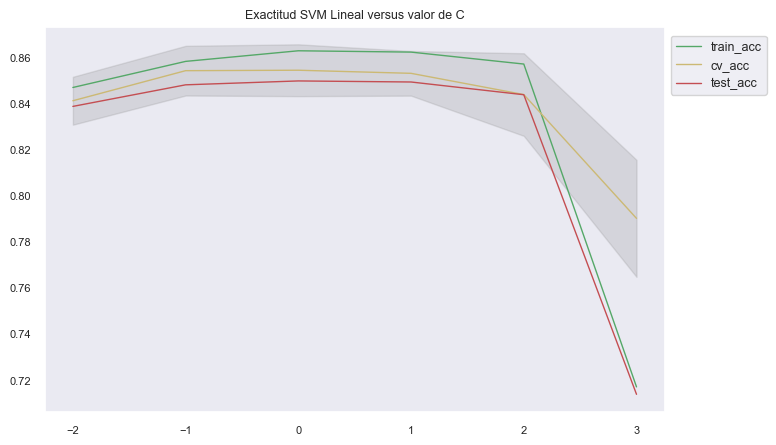

In [ ]:
cross_val_accuracy = np.array(cross_val_accuracy)
cross_val_std = np.array(cross_val_std)

lw=1
fs=9

fig, ax = plt.subplots(figsize=(8,5))

ax.plot(np.log10(C_values),train_accuracy,color='g',lw=lw,label='train_acc')
ax.plot(np.log10(C_values),cross_val_accuracy,color='y',lw=lw,label='cv_acc')
plt.fill_between(np.log10(C_values), cross_val_accuracy-cross_val_std, cross_val_accuracy+cross_val_std,color='gray', alpha=0.2)
ax.plot(np.log10(C_values),test_accuracy,color='r',lw=lw,label='test_acc')



plt.title("Exactitud SVM Lineal versus valor de C",size=fs)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.9),fontsize=fs)
plt.show()

En estos datos parece ser que el modelo seleccionado es casi óptimo, ya que valores más grandes parece que hacen decaer el rendimiento del modelo.

## 4.6 ¿Cómo cambia la cantidad de Support Vectors?

In [ ]:
for (model,C) in zip(models,C_values):
    print("C: ",C," #SV own: ",qSupportVectors(model, X_train_encoded))

C:  0.01  #SV own:  2086
C:  0.1  #SV own:  1661
C:  1.0  #SV own:  1498
C:  10.0  #SV own:  1497
C:  100.0  #SV own:  1674
C:  1000.0  #SV own:  2851


Al parecer en ambos extremos la cantidad de SV crece. Esto se puede explicar por que un C pequeño, hace que varios datos puedan estar dentro cerca del plano separador, ya que el margen admite excepciones. A medida que crece C, este tiene a hacer overfitting, lo que termina haciendo que el plano se cruce cerca de muchos datos.

Es interesante observar que a mayor cantidad de SVs no necesariamente el resultado mejora. Esto indica que hay calidad entre diferentes SVs.

## 4.7 Estudio del desempeño

In [ ]:
svm = LinearSVC(C=best_C,loss='hinge').fit(X_train_encoded,y_train)
svm

LinearSVC(loss='hinge')

In [ ]:
y_pred_test = svm.predict(X_test_encoded)

print("Accuracy: ",accuracy_score(y_test, y_pred_test))
print("Precision: ",precision_score(y_test, y_pred_test))
print("Recall: ",recall_score(y_test, y_pred_test))

Accuracy:  0.8498387839705205
Precision:  0.7143895348837209
Recall:  0.6269132653061225


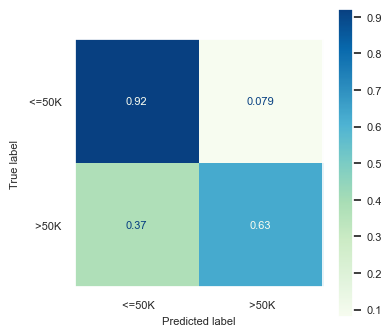

In [ ]:
#labels = le_class.inverse_transform([le_class.classes_[0], le_class.classes_[1]])
fig, ax = plt.subplots(figsize=(4,4))
cm = confusion_matrix(y_test, y_pred_test, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le_class.classes_)
disp = disp.plot(ax=ax,cmap=plt.cm.GnBu)
plt.show()

Exactitud (Accuracy): Se refiere a la confianza que tiene el modelo en clasificar un dato correctamente, independiente de la clase.

Precisión: Se refiere a la confianza que tiene el modelo en clasificar un dato correctamente dado que lo predijo como la clase positiva.

Recall: Se refiere a la confianza que tiene el modelo en reconocer que un dato es de la clase positiva dado que el dato es de esta clase.

Precisión y Recall solo funcionan en casos binarios, mientras que Exactitud funciona en cualquier cantidad de clases. La diferencia entre precisión y exactitud es que la primera se concentra en los datos bien clasificados de la clase positiva, mientras que la segunda de ambas clases.

El modelo claramente tiene una mayor dificultad en clasificar datos de la clase positiva, ya que se tiene menos de estos datos.

# P5. SVM No-Lineal

Estudie el desempeño de una SVM con kernel RBF en el problema.

    5.1 Entrene una SVM con kernel RBF. Utilice el valor por defecto del parámetro gamma explicando cómo se determina. Para comenzar, utilice un valor de C que aproxime una "hard-margin SVM". Mida la exactitud (accuracy) sobre el conjunto de entrenamiento y el número de support vectors obtenidos.

    5.2 Proponga un método que permita estimar la exactitud del modelo anterior sobre datos no vistos en la fase de entrenamiento. Evalúe la exactitud sobre el conjunto de pruebas, compare con su estimación, y comente sobre la capacidad de generalización del modelo.

    5.3 Utilice el método anterior para evaluar diferentes valores de C y elegir un valor apropiado. Expliqué porqué a diferencia de la SVM lineal, en este caso sí se llega a error de entrenamiento 0 al aumentar el valor de C.

    5.4 Sólo con fines educativos, utilice el conjunto de pruebas para evaluar los diferentes modelos entrenados en el punto anteror, determinnado si el modelo seleccionado es efectivamente óptimo o casi óptimo en este conjunto.


    5.5 Estudie cómo cambia el número de support vectors a medida que disminuye el valor de C.

    5.6 Proponga y ejecute un método para elegir automáticamente el valor de C.

    5.7 Estudie el desempeño detallado del modelo seleccionado explicando la diferencia entre métricas como exactitud, precisión, y recall. Determine si el modelo tiene mayor dificultad con alguna de las clases.

## 5.1 Hard-margin y cantidad de Support Vectors

In [ ]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', C=100000)
svm.fit(X_train_encoded,y_train)

SVC(C=100000)

In [ ]:
y_pred_train = svm.predict(X_train_encoded)
print("accuracy tr: ", np.sum(y_pred_train==y_train)/len(y_train))

accuracy tr:  0.9765789978882703


In [ ]:
print("#SV: ",np.sum(svm.n_support_))

#SV:  1397


El parámetro $\gamma$ (gamma) representa cuanto se castiga una la distancia entre los datos comparados. Mientras más grande sea el $\gamma$ menor es la distancia admisible para decir que dos vectores se parecen.

Con un $C = 100000$ la exactitud es casi un 100% sobre el conjunto de entranamiento y la cantidad de vectores de soporte es de 1415.

## 5.2 Rendimiento en conjunto de pruebas

In [ ]:
svm = SVC(kernel='rbf')
cv_train = cross_val_score(svm, X_train_encoded, y_train, cv=5)
print("accuracy tr: ", cv_train.mean())

accuracy tr:  0.860627331242475


In [ ]:
svm = SVC(kernel='rbf')
svm.fit(X_train_encoded,y_train)

SVC()

In [ ]:
y_pred_test = svm.predict(X_test_encoded)
print("accuracy ts: ", np.sum(y_pred_train==y_test)/len(y_test))

accuracy ts:  0.0


Se utilizó cross-validation y se tomó la media.

La exactitud en el conjunto de pruebas es mucho peor que la del conjunto de entrenamiento. Esto significa que hubo un overfitting importante y se perdió capacidad de generalización.

## 5.3 Encontrar mejor C

In [ ]:
C_values = np.logspace(-2, 3, num=6, endpoint=True, base=10.0)
print(C_values)

test_accuracy_rbf = []
cross_val_accuracy_rbf = []
cross_val_std_rbf = []
train_accuracy_rbf = []
rbf_models = []

best_score = -1
best_C = 0

for C_val in C_values:
  svm = SVC(kernel='rbf', C=C_val)
  cv_output = cross_val_score(svm, X_train_encoded, y_train, cv=5)
  cross_val_accuracy_rbf.append(cv_output.mean())
  cross_val_std_rbf.append(cv_output.std())
  if(cv_output.mean() >= best_score):
    best_score = cv_output.mean()
    best_C = C_val


  svm = SVC(kernel='rbf', C=C_val)
  svm.fit(X_train_encoded,y_train)
  train_accuracy_rbf.append(svm.score(X_train_encoded,y_train))
  test_accuracy_rbf.append(svm.score(X_test_encoded,y_test))
  rbf_models.append(svm)
  print("done C=",C_val)

[1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
done C= 0.01
done C= 0.1
done C= 1.0
done C= 10.0
done C= 100.0
done C= 1000.0


In [ ]:
best_C

Usando cross-validation se encontró que el mejor valor es $C= 1$. A diferencia del método sin kernel, ahora los datos si se pueden separa linealmente, solo que en una dimensión que es técnicamente infinita. Esto se logra gracias al uso de kerneles que pueden aumentar la dimensionalidad para hacer crecer la probabilidad de que los datos sean linealmente separables.

## 5.4 Comparar con datos de prueba

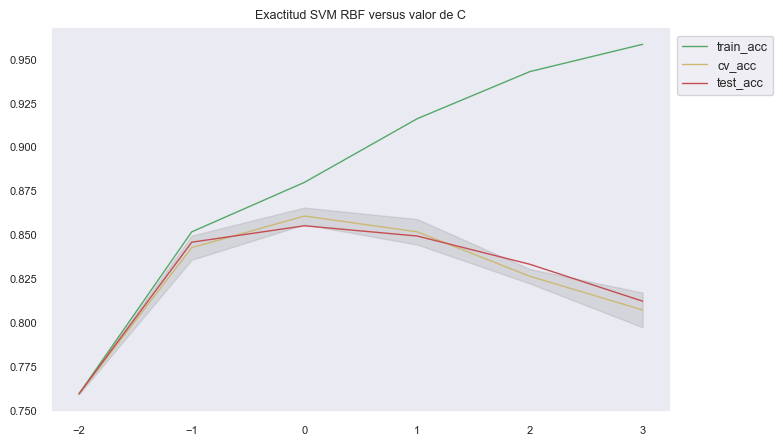

In [ ]:
cross_val_accuracy_rbf = np.array(cross_val_accuracy_rbf)
cross_val_std_rbf = np.array(cross_val_std_rbf)

lw=1
fs=9

fig, ax = plt.subplots(figsize=(8,5))
ax.plot(np.log10(C_values),train_accuracy_rbf,color='g',lw=lw,label='train_acc')
ax.plot(np.log10(C_values),cross_val_accuracy_rbf,color='y',lw=lw,label='cv_acc')
plt.fill_between(np.log10(C_values), cross_val_accuracy_rbf-cross_val_std_rbf, cross_val_accuracy_rbf+cross_val_std_rbf,color='gray', alpha=0.2)
ax.plot(np.log10(C_values),test_accuracy_rbf,color='r',lw=lw,label='test_acc')
plt.title("Exactitud SVM RBF versus valor de C",size=fs)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.9),fontsize=fs)
plt.show()

Por lo que se puede ver, este C es óptimo en el conjunto de pruebas.

Cabe mencionar que a medida que se aumenta C, hay propensidad de hacer overfitting de los datos, ya que ahora los datos son separables.

## 5.5 Cantidad de Support Vectors

In [ ]:
for (model,C) in zip(rbf_models,C_values):
    print("C: ",C," #SV: ",np.sum(model.n_support_))

C:  0.01  #SV:  2528
C:  0.1  #SV:  2343
C:  1.0  #SV:  1927
C:  10.0  #SV:  1907
C:  100.0  #SV:  1829
C:  1000.0  #SV:  1664


Hay una diferencia en como se comporta en comparación al método anterior. Ahora los SVs no aumentan a medida que aumenta C, solo cuando disminuyen. Es puede deberse a que el kernel no lineal puede separar mejor los datos que el kernel lineal.

## 5.6 Automatizar elección de modelo

Se utilizó el proceso de 5.3.

Cabe recalcar que se podría utilizar la cantidad de Support Vector para elegir el mejor mejor. Esto se basa en que el plano necesita de SVs para su orientación y posición, lo que puede significar que mientras más SVs, mejor es el plano separador.

## 5.7 Estudio del desempeño

In [ ]:
svm = SVC(kernel='rbf', C=best_C).fit(X_train_encoded,y_train)
svm

SVC()

In [ ]:
y_pred_test = svm.predict(X_test_encoded)

print("Accuracy: ",accuracy_score(y_test, y_pred_test))
print("Precision: ",precision_score(y_test, y_pred_test))
print("Recall: ",recall_score(y_test, y_pred_test))

Accuracy:  0.8550591125441425
Precision:  0.7422360248447205
Recall:  0.6096938775510204


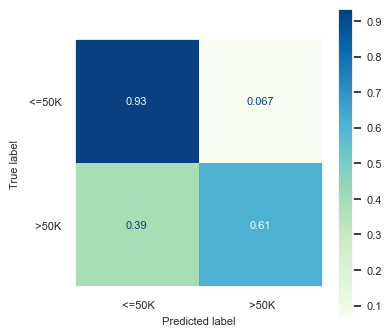

In [ ]:
fig, ax = plt.subplots(figsize=(4,4))
cm = confusion_matrix(y_test, y_pred_test, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le_class.classes_)
disp = disp.plot(ax=ax,cmap=plt.cm.GnBu)
plt.show()

El modelo no linear presenta un mayor overfitting de los datos. Esto se puede explicar por la capacidad de seperar los datos de forma perfecta. Se puede ver que tiene niveles de recall y precisión muy bajos.

# P6. Kerneles

Diseñe y aplique un método que permita seleccionar un kernel apropiado para la SVM.

    6.1 Implemente un método que permita elegir uno de dos kerneles no lineales posibles empleando valores por defecto para todos los demás parámetros.

    6.2 Implemente un método que permita elegir simultáneamente un valor para C y para el hiper-parámetro más importante del kernel seleccionado en el punto anterior. ¿Es posible sintonizar los valores de estos dos parámetros de modo independiente?

    6.3 Compare el efecto sobre sus estrategias de la idea de limitar la optimización del modelo, discutiendo lo que observa (Hint: la optimización de la SVM se puede relajar modificando los parámetros tol y max_iter).

    6.4 Estudie el desempeño detallado del mejor modelo seleccionado en esta sección.  

## 6.1 Elección de Kernel

In [ ]:
C_values = np.logspace(-2, 3, num=6, endpoint=True, base=10.0)
print(C_values)

cross_val_accuracy_rbf = []
cross_val_std_rbf = []
train_accuracy_rbf = []
test_accuracy_rbf = []

cross_val_accuracy_sigmoid = []
cross_val_std_sigmoid = []
train_accuracy_sigmoid = []
test_accuracy_sigmoid = []


best_score_rbf = -1
best_C_rbf = 0
best_score_sigmoid = -1
best_C_sigmoid = 0

for C_val in C_values:
  svm_rbf = SVC(kernel='rbf', C=C_val)
  svm_sigmoid = SVC(kernel='sigmoid', C=C_val)

  cv_output_rbf = cross_val_score(svm_rbf, X_train_encoded, y_train, cv=5)
  mean_result = cv_output_rbf.mean()
  cross_val_accuracy_rbf.append(mean_result)
  if(mean_result >= best_score_rbf):
    best_score_rbf = mean_result
    best_C_rbf = C_val


  cv_output_sigmoid = cross_val_score(svm_sigmoid, X_train_encoded, y_train, cv=5)
  mean_result = cv_output_sigmoid.mean()
  cross_val_accuracy_sigmoid.append(mean_result)
  if(mean_result >= best_score_sigmoid):
    best_score_sigmoid = mean_result
    best_C_sigmoid = C_val

  print("done C=",C_val)

[1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
done C= 0.01
done C= 0.1
done C= 1.0
done C= 10.0
done C= 100.0
done C= 1000.0


In [ ]:
print ("Sigmoid es mejor" if np.mean(cross_val_accuracy_sigmoid)>np.mean(cross_val_accuracy_rbf) else "RBF es mejor")
print("Mejor C: -Sigmoide- ",best_C_sigmoid," -RBF- ",best_C_rbf)

RBF es mejor
Mejor C: -Sigmoide-  0.1  -RBF-  1.0


Se tomó la media en vez del valor más alto para preferir robustez.

## 6.2 Sintonizar C y gamma

In [ ]:
C_values = np.logspace(3, -2, num=6, endpoint=True, base=10.0)
gamma_values = np.logspace(-2, 3, num=6, endpoint=True, base=10.0)
print(C_values)
print(gamma_values)


accuracy_rbf = np.zeros((6,6))

best_score_rbf = -1
best_pair_rbf = (0,0)

for (i,C_val) in enumerate(C_values):
    for (j,gamma_val) in enumerate(gamma_values):
        svm_rbf = SVC(kernel='rbf', C=C_val,gamma=gamma_val)

        cv_output = cross_val_score(svm_rbf, X_train_encoded, y_train, cv=10)

        test_score = cv_output.mean()
        accuracy_rbf[i][j] = test_score


        if(test_score >= best_score_rbf):
            best_score_rbf = test_score
            best_pair_rbf = (gamma_val,C_val)

        print("done C=",C_val," gamma=",gamma_val)

[1.e+03 1.e+02 1.e+01 1.e+00 1.e-01 1.e-02]
[1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
done C= 1000.0  gamma= 0.01
done C= 1000.0  gamma= 0.1
done C= 1000.0  gamma= 1.0
done C= 1000.0  gamma= 10.0
done C= 1000.0  gamma= 100.0
done C= 1000.0  gamma= 1000.0
done C= 100.0  gamma= 0.01
done C= 100.0  gamma= 0.1
done C= 100.0  gamma= 1.0
done C= 100.0  gamma= 10.0
done C= 100.0  gamma= 100.0
done C= 100.0  gamma= 1000.0
done C= 10.0  gamma= 0.01
done C= 10.0  gamma= 0.1
done C= 10.0  gamma= 1.0
done C= 10.0  gamma= 10.0
done C= 10.0  gamma= 100.0
done C= 10.0  gamma= 1000.0
done C= 1.0  gamma= 0.01
done C= 1.0  gamma= 0.1
done C= 1.0  gamma= 1.0
done C= 1.0  gamma= 10.0
done C= 1.0  gamma= 100.0
done C= 1.0  gamma= 1000.0
done C= 0.1  gamma= 0.01
done C= 0.1  gamma= 0.1
done C= 0.1  gamma= 1.0
done C= 0.1  gamma= 10.0
done C= 0.1  gamma= 100.0
done C= 0.1  gamma= 1000.0
done C= 0.01  gamma= 0.01
done C= 0.01  gamma= 0.1
done C= 0.01  gamma= 1.0
done C= 0.01  gamma= 10.0
done C= 0.01  gamma

In [ ]:
print("Best pair ",best_pair_rbf)

Best pair  (0.1, 1.0)


In [ ]:
pd.DataFrame(accuracy_rbf)

,0,1,2,3,4,5
0,0.846038,0.813402,0.791708,0.767904,0.760799,0.759072
1,0.859091,0.826839,0.799770,0.767712,0.760799,0.759072
2,0.861205,0.850836,0.802073,0.768480,0.760799,0.759072
3,0.855829,0.861396,0.804956,0.770976,0.761953,0.759072
4,0.788826,0.844694,0.770785,0.759263,0.759263,0.759263
5,0.759263,0.759263,0.759263,0.759263,0.759263,0.759263


<Axes: xlabel='gamma', ylabel='C'>

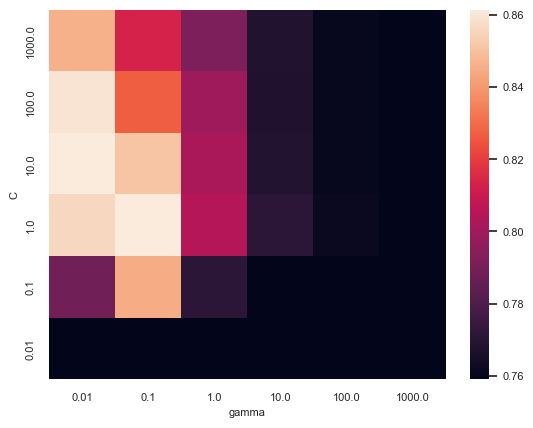

In [ ]:
graph = sns.heatmap(accuracy_rbf,xticklabels = gamma_values, yticklabels = C_values)
graph.set_xlabel("gamma")
graph.set_ylabel("C")
graph

In [ ]:
C_values = np.logspace(3, -2, num=6, endpoint=True, base=10.0)
print(C_values)


accuracy_rbf = np.zeros(6)

best_score_rbf = -1
best_C = 0

for (i,C_val) in enumerate(C_values):
    svm_rbf = SVC(kernel='rbf', C=C_val)

    cv_output = cross_val_score(svm_rbf, X_train_encoded, y_train, cv=10)
    test_score = cv_output.mean()
    accuracy_rbf[i] = test_score


    if(test_score >= best_score_rbf):
        best_score_rbf = test_score
        best_C= C_val

    print("done C=",C_val)

[1.e+03 1.e+02 1.e+01 1.e+00 1.e-01 1.e-02]
done C= 1000.0
done C= 100.0
done C= 10.0
done C= 1.0
done C= 0.1
done C= 0.01


In [ ]:
print("Best C ",best_C)

Best C  1.0


<Axes: >

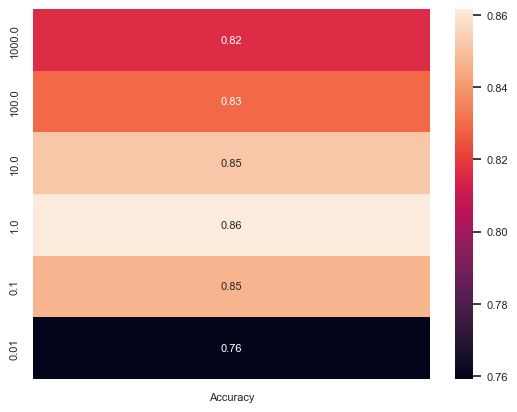

In [ ]:
df = pd.DataFrame({"Accuracy": accuracy_rbf},
                  index=C_values)

sns.heatmap(df, annot=True)

In [ ]:
gamma_values = np.logspace(3, -2, num=6, endpoint=True, base=10.0)
print(gamma_values)


accuracy_rbf = np.zeros(6)

best_score_rbf = -1
best_gamma = 0

for (i,gamma_val) in enumerate(gamma_values):
    svm_rbf = SVC(kernel='rbf', gamma=gamma_val)

    cv_output = cross_val_score(svm_rbf, X_train_encoded, y_train, cv=10)
    test_score = cv_output.mean()
    accuracy_rbf[i] = test_score


    if(test_score >= best_score_rbf):
        best_score_rbf = test_score
        best_gamma= gamma_val

    print("done gamma=",gamma_val)

[1.e+03 1.e+02 1.e+01 1.e+00 1.e-01 1.e-02]
done gamma= 1000.0
done gamma= 100.0
done gamma= 10.0
done gamma= 1.0
done gamma= 0.1
done gamma= 0.01


In [ ]:
print("Best gamma ",best_gamma)

Best gamma  0.1


<Axes: >

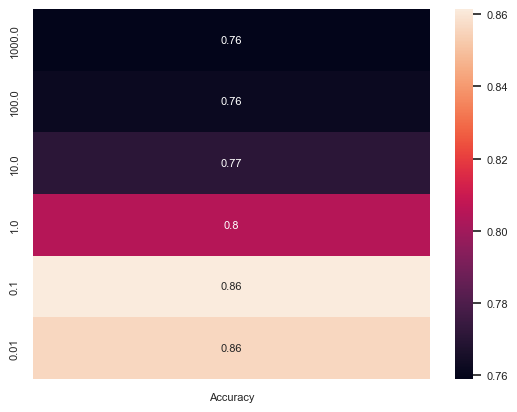

In [ ]:
df = pd.DataFrame({"Accuracy": accuracy_rbf},
                  index=gamma_values)

sns.heatmap(df, annot=True)

Se determinó que ambos son iguales. Esto puede deberse a que el resultado de accuracy es una combinación lineal de ambos parámetros, haciendo sus mínimos y máximos independientes del otro.

## 6.3 Relajar parámetros

In [ ]:
base_value = np.power(1/10,3)# Valor por defecto en sklearn para tol

n = np.linspace(0,11,num=12, dtype=int)

tol_values = np.power(2,n)*base_value
best_score_tol = -1

cross_val_accuracy_tol= []
test_accuracy_tol =[]
n_SV = []

for tol_val in tol_values:
  svm_tol = SVC(kernel='rbf',C=1000,gamma=0.01,tol=tol_val)

  cv_output_tol = cross_val_score(svm_tol, X_train_encoded, y_train, cv=5)
  mean_result = cv_output_tol.mean()

  cross_val_accuracy_tol.append(mean_result)

  if(mean_result >= best_score_tol):
    best_score_tol = mean_result
    best_tol_val = tol_val

  svm = SVC(kernel='rbf',C=1000,gamma=0.01,tol=tol_val)
  svm.fit(X_train_encoded,y_train)
  test_accuracy_tol.append(svm.score(X_test_encoded,y_test))
  n_SV.append(np.sum(svm.n_support_))

  print("done tol=",tol_val)

done tol= 0.0010000000000000002
done tol= 0.0020000000000000005
done tol= 0.004000000000000001
done tol= 0.008000000000000002
done tol= 0.016000000000000004
done tol= 0.03200000000000001
done tol= 0.06400000000000002
done tol= 0.12800000000000003
done tol= 0.25600000000000006
done tol= 0.5120000000000001
done tol= 1.0240000000000002
done tol= 2.0480000000000005


In [ ]:
best_tol_val

1.0240000000000002

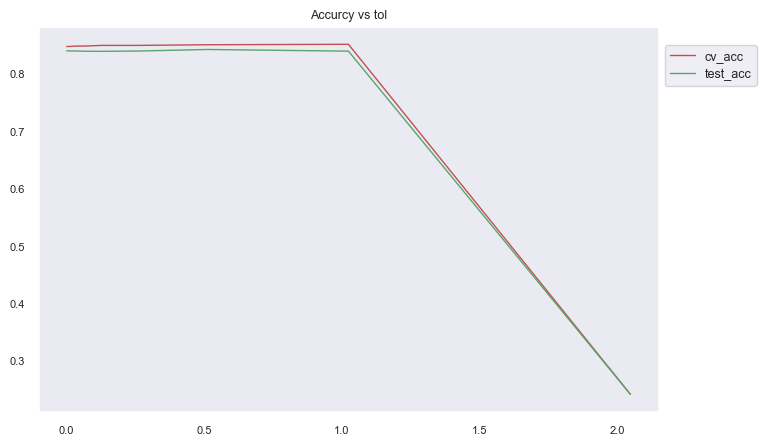

In [ ]:
cross_val_accuracy_tol = np.array(cross_val_accuracy_tol)
test_accuracy_tol = np.array(test_accuracy_tol)
n_SV = np.array(n_SV)


lw=1
fs=9

fig, ax = plt.subplots(figsize=(8,5))

ax.plot(tol_values,cross_val_accuracy_tol,color='r',lw=lw,label='cv_acc')
ax.plot(tol_values,test_accuracy_tol,color='g',lw=lw,label='test_acc')


plt.title("Accurcy vs tol",size=fs)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.9),fontsize=fs)
plt.show()

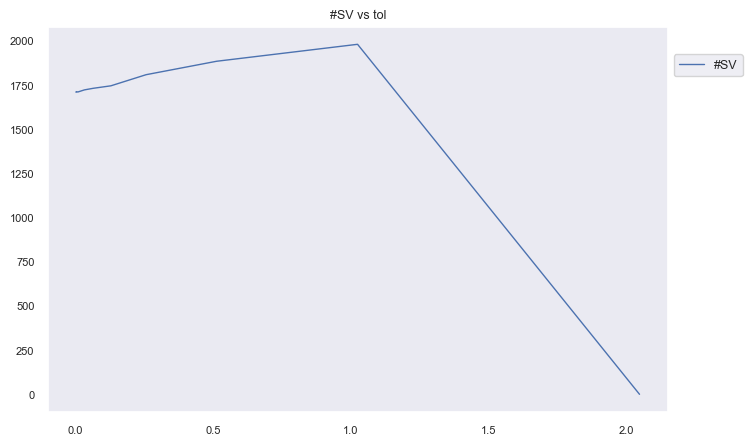

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))

ax.plot(tol_values,n_SV,color='b',lw=lw,label='#SV')


plt.title("#SV vs tol",size=fs)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.9),fontsize=fs)
plt.show()


A medida que se aumenta la tolerancia, el rendimiento se mantiene constante hasta un punto de quiebre. Esto puede significar que el algoritmo no converge cuando tol > 1.

Es interesante observar también que la cantidad de SVs disminuye junto con el rendimiento del modelo.

Juntando ambos, puede que haya una cantidad crítica de SVs para que el modelo converga.

## 6.4 Estudio del desempeño

In [ ]:
svm = SVC(kernel='rbf', C=best_C, gamma=best_gamma,tol = best_tol_val).fit(X_train_encoded,y_train)
svm

SVC(gamma=0.1, tol=1.0240000000000002)

In [ ]:
y_pred_test = svm.predict(X_test_encoded)

print("Accuracy: ",accuracy_score(y_test, y_pred_test))
print("Precision: ",precision_score(y_test, y_pred_test))
print("Recall: ",recall_score(y_test, y_pred_test))

Accuracy:  0.8536772608628896
Precision:  0.7306826706676669
Recall:  0.6211734693877551


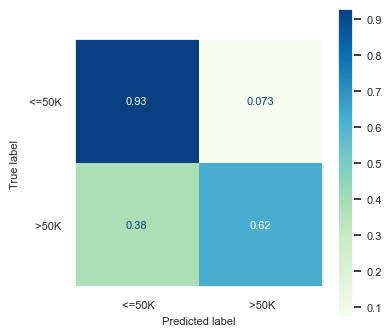

In [ ]:
fig, ax = plt.subplots(figsize=(4,4))
cm = confusion_matrix(y_test, y_pred_test, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le_class.classes_)
disp = disp.plot(ax=ax,cmap=plt.cm.GnBu)
plt.show()

Tiene un rendimiento muy parecido a los 2 modelos anteriores.

# P7. SVM & Atributos

Estudie qué características son más relevantes para la SVM.

    7.1 Aprovechando la linealidad de la primera SVM entrenada, determine cuáles son las 20 características reciben mayor "peso" en la SVM.

    7.2 Proponga una técnica que permita evaluar explícitamente la importancia de un atributo al entrenar una SVM, discutiendo las limitaciones esperadas.

    7.3 Aplique su método para determinar las 20 características más importantes para la SVM lineal y compare con el resultado del método anterior.

    7.4 Aplique su método para determinar las 20 características más importantes para alguna de las (buenas) SVM no lineales entrenadas con anterioridad. Compare con los resultados obtenidos para la SVM lineal.


## 7.1 Determinar coeficientes más importantes

In [ ]:
from sklearn.svm import LinearSVC
svm = LinearSVC(C=10,loss='hinge')
svm.fit(X_train_encoded,y_train)

LinearSVC(C=10, loss='hinge')

In [ ]:
idx = np.argsort(np.abs(svm.coef_))
idx = idx[0,:20]
importance1 = X_train_encoded.columns[idx]
print(importance1)

Index(['workclass_ Without-pay', 'occupation_ Armed-Forces',
       'native-country_ Peru', 'native-country_ Honduras',
       'native-country_ Vietnam', 'native-country_ Outlying-US(Guam-USVI-etc)',
       'native-country_ Nicaragua', 'native-country_ South',
       'native-country_ Portugal', 'native-country_ Taiwan',
       'native-country_ Dominican-Republic', 'native-country_ Haiti',
       'native-country_ Columbia', 'marital-status_ Married-AF-spouse',
       'native-country_ Puerto-Rico', 'education_ Some-college',
       'native-country_ Scotland', 'native-country_ Mexico',
       'occupation_ Adm-clerical', 'native-country_ Yugoslavia'],
      dtype='object')


Utilizando el atributo *coef_* se obtienen las caraterísticas más importantes. Se ocupa el valor absoluto ya que las clases son +1 y -1.

## 7.2 permutation_importance

In [ ]:
from sklearn.inspection import permutation_importance
clf = LinearSVC(C=10,loss='hinge')
clf.fit(X_train_encoded,y_train)
scores = permutation_importance(clf, X_train_encoded, y_train, n_repeats=10,random_state=0)
idx = np.argsort(scores.importances_mean)

Existe en *sklearn.inspection* la función *permutation_importance*. Este método evalua el data set usando un modelo entrenado y una métrica. Esta primera evaluación es el puntaje base. Después se escoge una columna, se permutan sus valores y se evalúa de nuevo. Esto se repite *n_repeats* veces. Este proceso se hace por separado para cada columna. La diferencia de puntajes debería ser proporcional a la importancia de cada columna.

Esto tiene el problema de que ve los efectos por separado de cada columna lo que es un acercamiento iluso, ya que muchas veces hay interacción entre características.

## Aplicar nuevo método y comparar

In [ ]:
idx = idx[:20]
importance2 = X_train_encoded.columns[idx]
print(importance2)

Index(['occupation_ Handlers-cleaners', 'occupation_ Protective-serv',
       'relationship_ Husband', 'occupation_ Craft-repair',
       'marital-status_ Separated', 'workclass_ Private', 'education_ HS-grad',
       'workclass_ Self-emp-inc', 'race_ White', 'native-country_ Philippines',
       'native-country_ Guatemala', 'education_ 12th',
       'marital-status_ Married-spouse-absent', 'occupation_ Priv-house-serv',
       'education_ Preschool', 'marital-status_ Widowed',
       'native-country_ Cambodia',
       'native-country_ Outlying-US(Guam-USVI-etc)', 'native-country_ Haiti',
       'occupation_ Armed-Forces'],
      dtype='object')


In [ ]:
count = 0
for match in map(lambda a: a in importance2, importance1):
    count += match
print(count/20*100,"%")

15.0 %


El segundo método tuvo resultados muy diferentes, teniendo un 15% de las columnas obtenidas por el primer método. Una diferencia es que columnas de país de origen ya no se presentan tanto y aparecen como relevantes la educación de la persona.

## Aplicarlo en una SVM no-lineal

In [ ]:
svm = SVC(kernel='rbf', C=best_C).fit(X_train_encoded,y_train)

scores = permutation_importance(svm, X_train_encoded, y_train, n_repeats=5,random_state=0)
idx = np.argsort(scores.importances_mean)

idx = idx[:20]
importance3 =X_train_encoded.columns[idx]
print(importance3)

Index(['relationship_ Own-child', 'relationship_ Not-in-family', 'sex_ Female',
       'sex_ Male', 'marital-status_ Separated', 'occupation_ Priv-house-serv',
       'native-country_ Guatemala', 'native-country_ Canada',
       'native-country_ China', 'native-country_ Columbia',
       'education_ 5th-6th', 'native-country_ Jamaica',
       'native-country_ Poland', 'native-country_ Vietnam',
       'native-country_ Trinadad&Tobago', 'native-country_ Thailand',
       'native-country_ South', 'native-country_ Peru',
       'native-country_ Outlying-US(Guam-USVI-etc)',
       'native-country_ Nicaragua'],
      dtype='object')


In [ ]:
count = 0
for match in map(lambda a: a in importance3, importance1):
    count += match
print("1-3",count/20*100,"%")
count = 0
for match in map(lambda a: a in importance3, importance2):
    count += match
print("2-3",count/20*100,"%")

1-3 30.0 %
2-3 20.0 %


# P8. Árboles

Estudie el desempeño de un árbol de clasificación en el problema.


    8.1 Entrene un árbol de clasificación cuyo crecimiento esté guiado por la minimización de la entropía. Usando parámetros por defecto, mida la capacidad de generalización del modelo resultante.

    8.2 Limitando la profundidad a 4 niveles, entrene y visualice un árbol clasificación explicando la forma en que éste asigna una clase a un dato de entrada.

    8.3 Explique la diferencia entre entrenar el árbol usando el índice de Gini en lugar de la entropía. Mida cuál de los dos árboles obtiene una mayor capacidad de generalización.

    8.4 Proponga un método que permita elegir entre uno de los dos criterios de crecimiento estudiados de modo de minimizar el error de predicción. Sólo con fines educativos, verifique si su método hace la elección correcta, midiendo el error sobre el conjunto de pruebas.

    8.5 Como habrán notado las estudiantes curiosas, sklearn no permite entrenar apropiadamente un árbol de decisión con atributos categóricos (si bien el modelo ciertamente puede hacerlo). Modifique la codificación realizada en en P3 usando un OrdinalEncoder para los atributos categóricos en vez de un OneHotEncoder. Entrene un árbol (profundidad máxima 4), visualice el resultado, y explique porqué este método no es correcto.

    8.6 Estudie el desempeño detallado del modelo determinando si exhibe una mayor dificultad con alguna de las clases.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree
import matplotlib.pyplot as plt

tree_model = DecisionTreeClassifier(criterion='entropy')
tree_model.fit(X_train_encoded, y_train)

y_pred = tree_model.predict(X_test_encoded)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy del modelo en el conjunto de prueba: {accuracy}')

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

#plt.figure(figsize=(20,10))
#tree.plot_tree(tree_model, filled=True, feature_names=X_train_encoded.columns, class_names=True)
#plt.show()

Accuracy del modelo en el conjunto de prueba: 0.812375249500998
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      4945
           1       0.61      0.61      0.61      1568

    accuracy                           0.81      6513
   macro avg       0.74      0.74      0.74      6513
weighted avg       0.81      0.81      0.81      6513

[[4330  615]
 [ 607  961]]


Accuracy del modelo en el conjunto de prueba: 0.8343313373253493





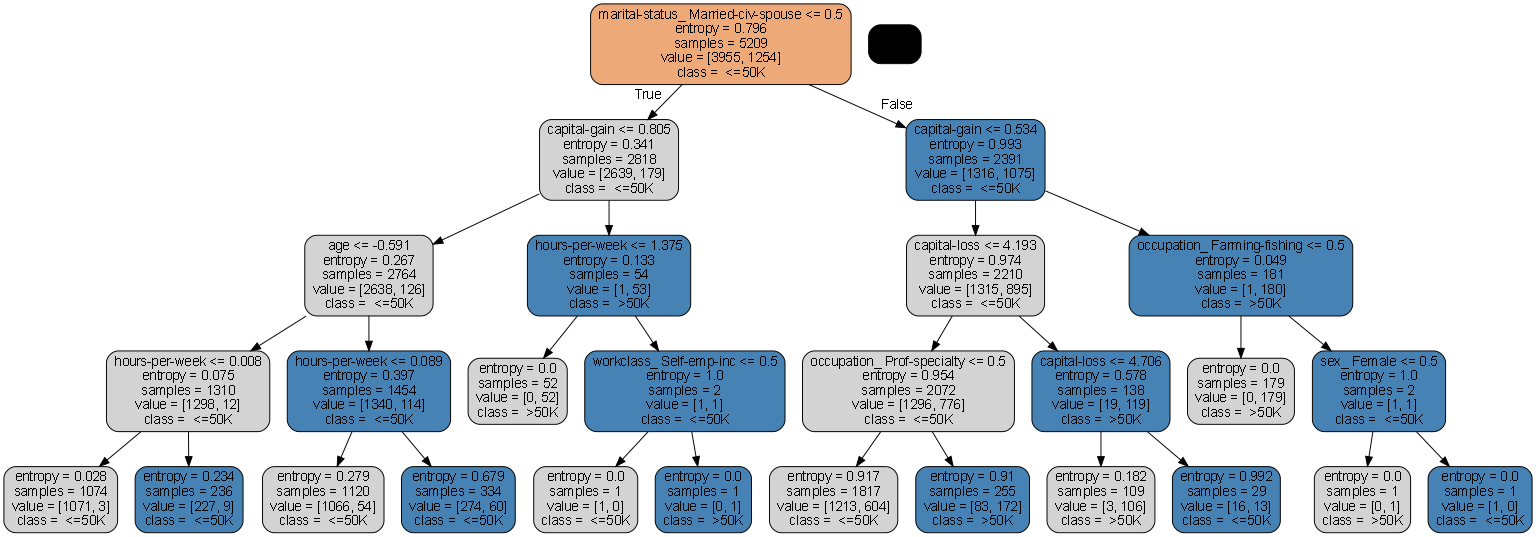

In [ ]:

from sklearn import tree
from IPython.display import Image as PImage
from PIL import Image, ImageDraw, ImageFont
from pydotplus import graphviz
import pydotplus
import collections

clf =  DecisionTreeClassifier(max_depth = 4, criterion='entropy')
clf.fit(X_train_encoded,y_train)
y_pred = clf.predict(X_test_encoded)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy del modelo en el conjunto de prueba: {accuracy}')
dot_data = tree.export_graphviz(clf, out_file="mi_arbol.dot", feature_names = X_train_encoded.columns,
                              class_names = le_class.classes_, rounded = True, filled= True )

graph = pydotplus.graph_from_dot_file("mi_arbol.dot")

nodes = graph.get_node_list()
edges = graph.get_edge_list()

colors = ('lightgray', 'steelblue') #'rosybrown')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

graph.write_png('mi_arbol.png')
graph.set_size('16,16!"')
graph.set_fontname
graph.write_png('mi_arbol_resized.png')


img = Image.open("mi_arbol_resized.png")

print("\n\n")
PImage("mi_arbol_resized.png")


Accuracy del modelo en el conjunto de prueba: 0.8389375095961922





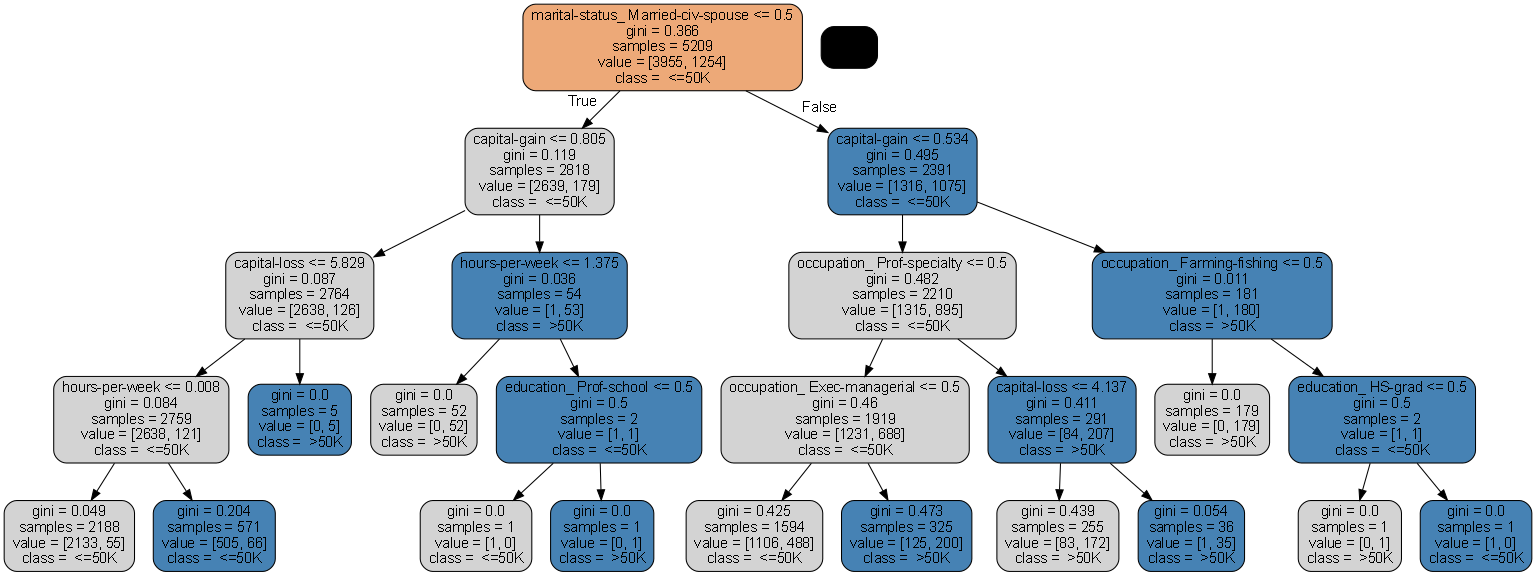

In [ ]:
from sklearn import tree
from IPython.display import Image as PImage
from PIL import Image, ImageDraw, ImageFont
from pydotplus import graphviz
import pydotplus
import collections

clf =  DecisionTreeClassifier(max_depth = 4, criterion='gini')
clf.fit(X_train_encoded,y_train)
y_pred = clf.predict(X_test_encoded)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy del modelo en el conjunto de prueba: {accuracy}')

dot_data = tree.export_graphviz(clf, out_file="mi_arbol.dot", feature_names = X_train_encoded.columns,
                              class_names = le_class.classes_, rounded = True, filled= True )

graph = pydotplus.graph_from_dot_file("mi_arbol.dot")

nodes = graph.get_node_list()
edges = graph.get_edge_list()

colors = ('lightgray', 'steelblue') #'rosybrown')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

graph.write_png('mi_arbol.png')
graph.set_size('16,16!"')
graph.set_fontname
graph.write_png('mi_arbol_resized.png')


img = Image.open("mi_arbol_resized.png")

print("\n\n")
PImage("mi_arbol_resized.png")


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler

continuous_features = ['age', 'capital-gain', 'capital-loss', 'hours-per-week']

X_train_encoded = data_train[continuous_features]
X_test_encoded = data_test[continuous_features]

continuous_scaler = MinMaxScaler()
continuous_scaler.fit(X_train_encoded)

X_train_encoded = pd.DataFrame(continuous_scaler.transform(X_train_encoded),columns=continuous_features)
X_test_encoded = pd.DataFrame(continuous_scaler.transform(X_test_encoded),columns=continuous_features)

categorical_features = ['workclass', 'education', 'marital-status',  'occupation', 'relationship', 'race',  'sex',  'native-country']

categorical_encoder = OrdinalEncoder()
cat_X_train_encoded = categorical_encoder.fit_transform(data_train[categorical_features])
cat_X_train_encoded = pd.DataFrame(cat_X_train_encoded,columns=categorical_encoder.get_feature_names_out(categorical_features))
X_train_encoded = pd.concat([X_train_encoded,cat_X_train_encoded],axis=1)
cat_X_test_encoded = categorical_encoder.transform(data_test[categorical_features])
cat_X_test_encoded = pd.DataFrame(cat_X_test_encoded,columns=categorical_encoder.get_feature_names_out(categorical_features))
X_test_encoded = pd.concat([X_test_encoded,cat_X_test_encoded],axis=1)


Accuracy del modelo en el conjunto de prueba: 0.8217411331183786





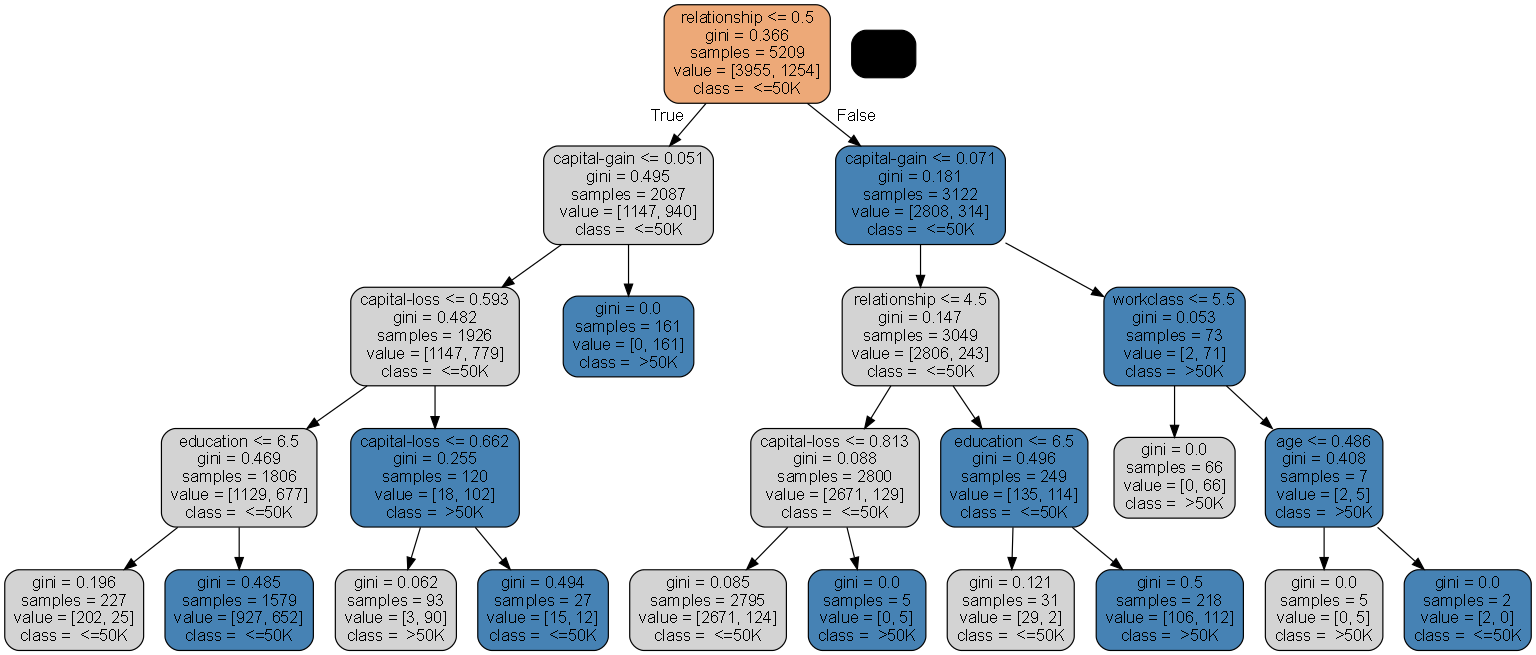

In [ ]:

from sklearn import tree
from IPython.display import Image as PImage
from PIL import Image, ImageDraw, ImageFont
from pydotplus import graphviz
import pydotplus
import collections

clf2 =  DecisionTreeClassifier(max_depth = 4, criterion='gini')
clf2.fit(X_train_encoded,y_train)
y_pred = clf2.predict(X_test_encoded)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy del modelo en el conjunto de prueba: {accuracy}')

dot_data = tree.export_graphviz(clf2, out_file="mi_arbol2.dot", feature_names = X_train_encoded.columns,
                              class_names = le_class.classes_, rounded = True, filled= True )

graph = pydotplus.graph_from_dot_file("mi_arbol2.dot")

nodes = graph.get_node_list()
edges = graph.get_edge_list()

colors = ('lightgray', 'steelblue') #'rosybrown')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

graph.write_png('mi_arbol2.png')
graph.set_size('16,16!"')
graph.set_fontname
graph.write_png('mi_arbol2_resized.png')


img = Image.open("mi_arbol2_resized.png")

print("\n\n")
PImage("mi_arbol2_resized.png")


In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion='gini')
tree_model.fit(X_train_encoded,y_train)

DecisionTreeClassifier()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

criterios = ['gini', 'entropy']
mean_scores = {}

for criterion in criterios:
    clf = DecisionTreeClassifier(max_depth = 4,criterion=criterion)
    scores = cross_val_score(clf, X_train_encoded, y_train, cv=5, scoring='accuracy')
    mean_scores[criterion] = scores.mean()

best_criterion = max(mean_scores, key=mean_scores.get)
print(f"Mejor criterio basado en la validación cruzada: {best_criterion}")

final_clf = DecisionTreeClassifier(criterion=best_criterion)
final_clf.fit(X_train_encoded, y_train)

y_pred = final_clf.predict(X_test_encoded)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitud del modelo en el conjunto de pruebas: {test_accuracy}")


Mejor criterio basado en la validación cruzada: gini
Exactitud del modelo en el conjunto de pruebas: 0.812375249500998


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

# Asumiendo que y_test y y_pred están definidos.
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train_encoded, y_train)
# Matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(conf_matrix)

# Métricas de Clasificación
class_report = classification_report(y_test, y_pred)
print("Reporte de Clasificación:")
print(class_report)

# Curva ROC y AUC solo para clasificación binaria
if len(set(y_test)) == 2:  # Si el problema es binario
    roc_auc = roc_auc_score(y_test, y_pred)
    print(f"ROC AUC: {roc_auc}")

# Importancia de las Características
feature_importances = clf.feature_importances_
print("Importancia de las Características:")
for name, importance in zip(X_train_encoded.columns, feature_importances):
    print(f"{name}: {importance}")


Matriz de Confusión:
[[4324  621]
 [ 601  967]]
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      4945
           1       0.61      0.62      0.61      1568

    accuracy                           0.81      6513
   macro avg       0.74      0.75      0.74      6513
weighted avg       0.81      0.81      0.81      6513

ROC AUC: 0.7455638941623162
Importancia de las Características:
age: 0.1900171952938096
capital-gain: 0.11388158314228686
capital-loss: 0.03720300561703643
hours-per-week: 0.11708530139511447
workclass: 0.057134314877963686
education: 0.10099530892137894
marital-status: 0.009983016192842203
occupation: 0.10713121645282257
relationship: 0.2122947523867341
race: 0.01941902769765338
sex: 0.007858189692949002
native-country: 0.026997088329408937


# P9. Árboles Regularizados

Evalúe diferentes métodos de regularización para árboles.

    9.1 Evalúe el efecto de limitar la profundidad máxima del árbol sobre el error de entrenamiento y sobre la capacidad de generalización del modelo.

    9.2 Proponga y evalúe experimentalmente un método que le permita seleccionar un valor adecuado de profundidad máxima.

    9.3 Usando parámetros por defecto para cualquier otro parámetro, evalúe el efecto de aplicar el mecanismo de poda de CART sobre el error de entrenamiento y sobre la capacidad de generalización del modelo. Estudie el efecto de diferentes valores para el parámetro de regularización.

    9.4 Proponga un método que permita elegir un valor apropiado para el parámetro de regularización necesario para ejecutar el método de poda de CART.

    9.5 Compare experimentalmente los tres métodos clásicos para regularizar un árbol: (i) limitar la profundidad, (ii) pedir un soporte mínimo por hoja, y (iii) podar el árbol.

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

cv = KFold(n_splits=10)

cv_accuracies = []
train_accuracies = []
test_accuracies = []


depth_range = range(1,20)

depth_to_idx = {depth_range[idx] : idx for idx in range(len(depth_range))}

for depth in depth_range:

    fold_accuracy = []
    tree_model = DecisionTreeClassifier(max_depth = depth)

    for train_fold, valid_fold in cv.split(X_train_encoded):

        x_train_fold = X_train_encoded.iloc[train_fold]
        x_val_fold = X_train_encoded.iloc[valid_fold]
        y_train_fold = y_train[train_fold]
        y_val_fold = y_train[valid_fold]

        tree_model.fit(x_train_fold, y_train_fold)
        valid_acc = tree_model.score(x_val_fold, y_val_fold)
        fold_accuracy.append(valid_acc)

    cv_acc = sum(fold_accuracy)/len(fold_accuracy)
    cv_accuracies.append(cv_acc)

    tree_model = DecisionTreeClassifier(max_depth = depth)

    tree_model.fit(X_train_encoded, y_train)

    train_acc = tree_model.score(X_train_encoded,y_train)
    test_acc = tree_model.score(X_test_encoded,y_test)

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

    print("done depth: ", depth)

done depth:  1
done depth:  2
done depth:  3
done depth:  4
done depth:  5
done depth:  6
done depth:  7
done depth:  8
done depth:  9
done depth:  10
done depth:  11
done depth:  12
done depth:  13
done depth:  14
done depth:  15
done depth:  16
done depth:  17
done depth:  18
done depth:  19


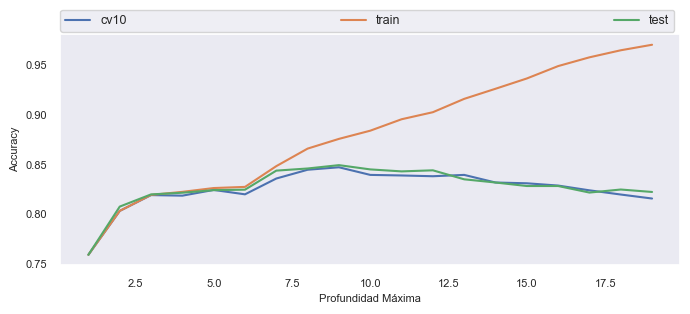

In [ ]:
fig, ax = plt.subplots(figsize=(8, 3))

ax.plot(depth_range,cv_accuracies,label='cv10')
ax.plot(depth_range,train_accuracies,label='train')
ax.plot(depth_range,test_accuracies,label='test')
ax.legend(bbox_to_anchor=(0.0, 1.01, 0.99, .102), loc='lower left', ncol=3, mode="expand", borderaxespad=0., fontsize=9)
ax.legend(bbox_to_anchor=(0.0, 1.01, 0.99, .102), loc='lower left', ncol=3, mode="expand", borderaxespad=0.,fontsize=9)
ax.set_xlabel("Profundidad Máxima")
ax.set_ylabel("Accuracy")
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score

mean_cross_val_scores = []

for depth in range(1, 20):
    model = DecisionTreeClassifier(max_depth=depth)
    scores = cross_val_score(model, X_train_encoded, y_train, cv=5, scoring='neg_mean_squared_error')
    mean_cross_val_scores.append(scores.mean())

best_depth = mean_cross_val_scores.index(max(mean_cross_val_scores)) + 1
print(best_depth)

9


Numero de nodos en el ultimo arbol es: 3 con ccp_alpha: 0.058774986828231846


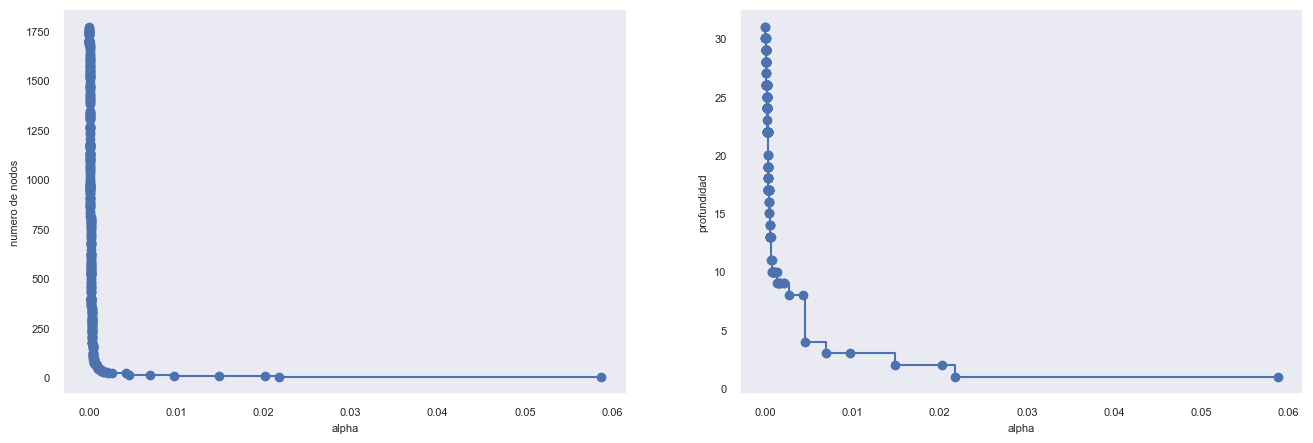

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
path = model.cost_complexity_pruning_path(X_train_encoded, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

trees = []
for ccp_alpha in ccp_alphas:
    tree = DecisionTreeClassifier(ccp_alpha=ccp_alpha)
    tree.fit(X_train_encoded, y_train)
    trees.append(tree)

print("Numero de nodos en el ultimo arbol es: {} con ccp_alpha: {}".format(trees[-1].tree_.node_count, ccp_alphas[-1]))

node_counts = [tree.tree_.node_count for tree in trees]
depth = [tree.tree_.max_depth for tree in trees]

fig, ax = plt.subplots(figsize=(16, 5),ncols=2,nrows=1)

ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("numero de nodos")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("profundidad")

plt.show()

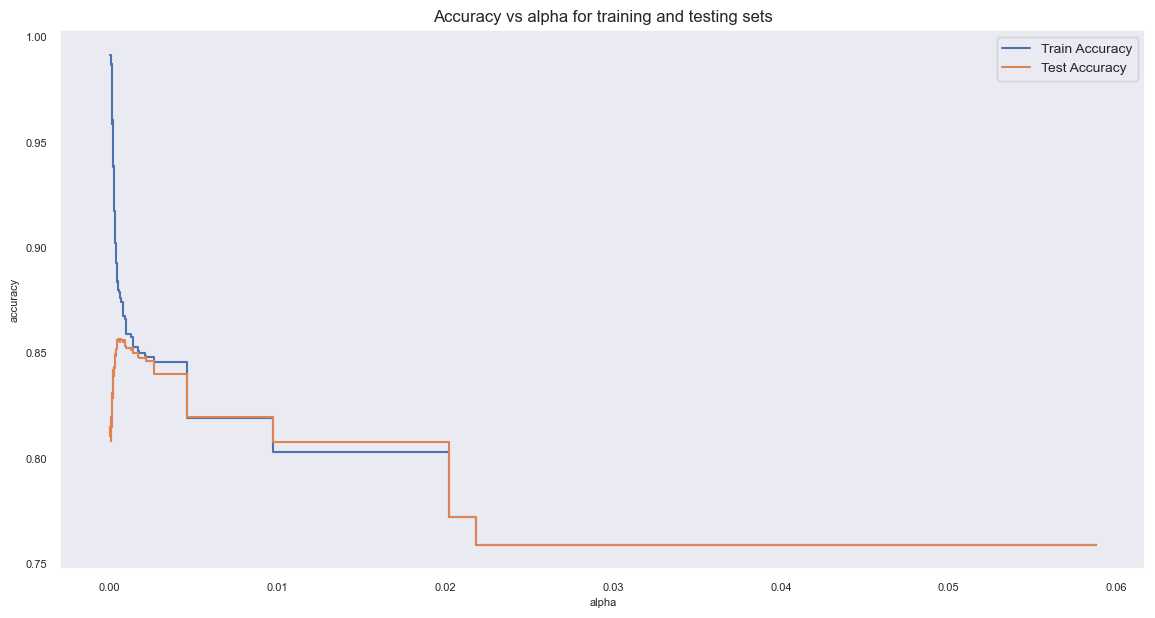

In [ ]:
train_acc = [tree.score(X_train_encoded, y_train) for tree in trees]
test_acc = [tree.score(X_test_encoded, y_test) for tree in trees]

plt.figure(figsize=(14, 7))
plt.plot(ccp_alphas, train_acc, label="Train Accuracy", drawstyle="steps-post")
plt.plot(ccp_alphas, test_acc, label="Test Accuracy", drawstyle="steps-post")
plt.xlabel("alpha")
plt.ylabel("accuracy")
plt.title("Accuracy vs alpha for training and testing sets")
plt.legend()
plt.show()


In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier


cv = KFold(n_splits=10)

cv_accuracies = []
train_accuracies = []
test_accuracies = []

for ccp_alpha in ccp_alphas:

    fold_accuracy = []
    tree_model = DecisionTreeClassifier(ccp_alpha=ccp_alpha)

    for train_fold, valid_fold in cv.split(X_train_encoded):

        x_train_fold = X_train_encoded.iloc[train_fold]
        x_val_fold = X_train_encoded.iloc[valid_fold]
        y_train_fold = y_train[train_fold]
        y_val_fold = y_train[valid_fold]

        tree_model.fit(x_train_fold, y_train_fold)
        valid_acc = tree_model.score(x_val_fold, y_val_fold)
        fold_accuracy.append(valid_acc)

    cv_acc = sum(fold_accuracy)/len(fold_accuracy)
    cv_accuracies.append(cv_acc)

    tree_model = DecisionTreeClassifier(ccp_alpha=ccp_alpha)

    tree_model.fit(X_train_encoded, y_train)

    train_acc = tree_model.score(X_train_encoded,y_train)
    test_acc = tree_model.score(X_test_encoded,y_test)

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)


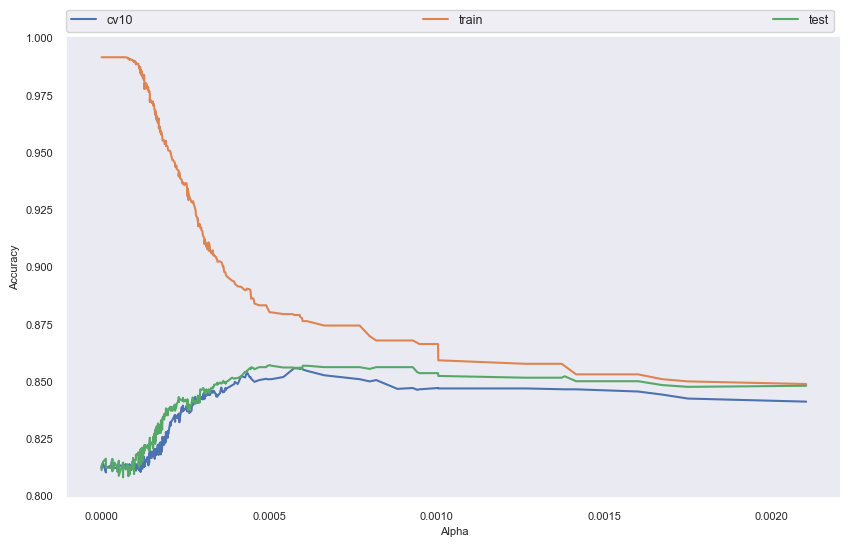

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

init=0
end=-10

ax.plot(ccp_alphas[init:end],cv_accuracies[init:end],label='cv10')
ax.plot(ccp_alphas[init:end],train_accuracies[init:end],label='train')
ax.plot(ccp_alphas[init:end],test_accuracies[init:end],label='test')
ax.legend(bbox_to_anchor=(0.0, 1.01, 0.99, .102), loc='lower left', ncol=3, mode="expand", borderaxespad=0., fontsize=9)
ax.legend(bbox_to_anchor=(0.0, 1.01, 0.99, .102), loc='lower left', ncol=3, mode="expand", borderaxespad=0., fontsize=9)
ax.set_xlabel("Alpha")
ax.set_ylabel("Accuracy")
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(criterion='entropy',min_samples_split=10)
tree_model.fit(X_train_encoded,y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_split=10)

In [ ]:
max_depths = range(1, 20)  # Por ejemplo, prueba profundidades de 1 a 20
depth_accuracies = []

for max_depth in max_depths:
    model = DecisionTreeClassifier(max_depth=max_depth)
    scores = cross_val_score(model, X_train_encoded, y_train, cv=10)
    depth_accuracies.append(scores.mean())


In [ ]:
min_samples_leafs = range(1, 20)  # Por ejemplo, de 1 a 20
leaf_accuracies = []

for min_samples_leaf in min_samples_leafs:
    model = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
    scores = cross_val_score(model, X_train_encoded, y_train, cv=10)
    leaf_accuracies.append(scores.mean())


In [ ]:
ccp_alphas = np.linspace(0.0001, 0.02, 100)  # Ajusta estos valores según tus necesidades
prune_accuracies = []

for ccp_alpha in ccp_alphas:
    model = DecisionTreeClassifier(ccp_alpha=ccp_alpha)
    scores = cross_val_score(model, X_train_encoded, y_train, cv=10)
    prune_accuracies.append(scores.mean())


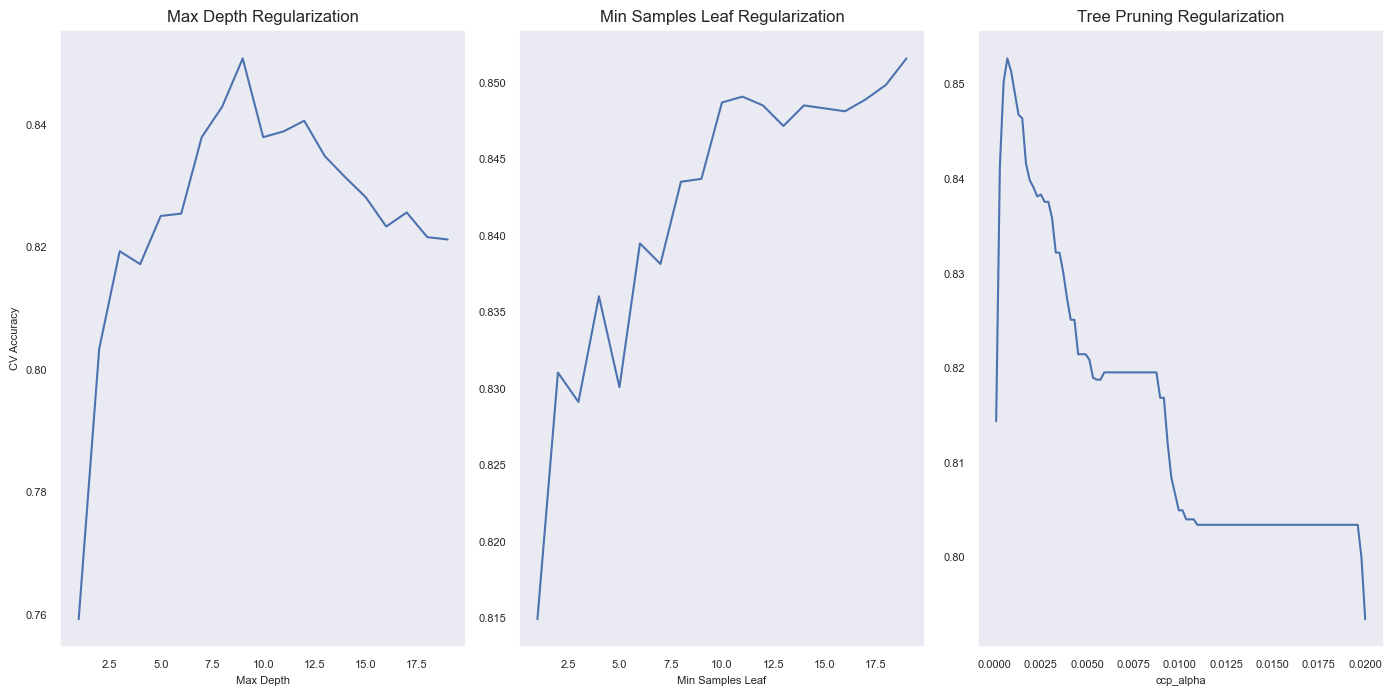

In [ ]:
plt.figure(figsize=(14, 7))

# Gráfico para la profundidad máxima
plt.subplot(131)
plt.plot(max_depths, depth_accuracies)
plt.title('Max Depth Regularization')
plt.xlabel('Max Depth')
plt.ylabel('CV Accuracy')

# Gráfico para el soporte mínimo por hoja
plt.subplot(132)
plt.plot(min_samples_leafs, leaf_accuracies)
plt.title('Min Samples Leaf Regularization')
plt.xlabel('Min Samples Leaf')

# Gráfico para la poda del árbol
plt.subplot(133)
plt.plot(ccp_alphas, prune_accuracies)
plt.title('Tree Pruning Regularization')
plt.xlabel('ccp_alpha')

plt.tight_layout()
plt.show()


# P10. Más Allá de lo Evidente.

Haga cosas originales para merecer una nota excelente. Por ejemplo:

*   Estudie el efecto de balancear los datos de entrenamiento sobre el desempeño del modelo (Hint: para medir correctamente los beneficios de aprender mejor clases minoritarias debe emplear métricas apropiadas).


In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import random

under = SMOTE(random_state=rn)
X_balanced, y_balanced = under.fit_resample(X_train_encoded, y_train)
print(X_balanced.shape,y_balanced.shape)

NameError: name 'rn' is not defined

*   Averigue si existe una forma de predecir probabilidades a partir de una SVM. Aplique este método para identificar algunos datos que este modelo predice con mucha incertidumbre y discuta las aplicaciones que podría tener esto.

*   Averigue en qué consiste el método de Nystroem para aproximar kerneles no lineales, impleméntelo, y determina si funciona en la práctica.


In [ ]:
from sklearn.kernel_approximation import Nystroem

*   Aproveche la colección grande de entrenamiento para determinar qué modelo se beneficia más al aumentar gradualmente el número de datos de entrenamiento (Hint: probablemente es más productivo utilizar una escala logarítimica. Por ejemplo duplicar el número de datos hasta alcanzar el total).